In [1]:
import ROOT
import uproot
import numpy as np
import array as array
import math
import matplotlib.pyplot as plt
import pickle
import hist
import mplhep as hep
from TUnfold import *
#import statistics as st
ROOT.gStyle.SetOptStat(000000)

objc[20074]: Class RunStopper is implemented in both /Users/ren/Applications/root/lib/libCore.6.28.06.so (0x10793a148) and /usr/local/lib/libCore.so (0x120a921f0). One of the two will be used. Which one is undefined.


Welcome to JupyROOT 6.28/06
0.7.21
4.3.7


In [25]:
#### open files                                                                                                                                               

#### Latest files
# fname="coffeaOutput/trijetHists_wXSscaling_QCDsim_newMBins_rapidity2.5_nominal2018.pkl"
# fname = "coffeaOutput/dijetHists_wXSscaling_QCDsim_newMBinsDR_rapidity2.5_nominal2018.pkl"
fname="coffeaOutput/dijetHists_wXSscaling_QCDsim_newMandPtBins_rapidity2.5_nominal2018.pkl"
fname="coffeaOutput/dijetHists_wXSscaling_QCDsim_2.5_newMandPtBins_rapiditypythia_nominal2018.pkl"
fname="coffeaOutput/dijetHists_wXSscaling_QCDsim_2.5_newMandPtBins_rapiditypythiaMG_nominal2018.pkl"
fname = "coffeaOutput/dijetHists_wXSscaling_QCDsim_rap2.5_JMRJMS__allUnc_2018RespOnly.pkl"
# fname="coffeaOutput/dijetHists_wXSscaling_QCDsim_rap2.5_JMRJMS_herwig_nominal_2018.pkl"
year = fname[-8:-4]
with open(fname, "rb") as f:
    result = pickle.load( f )

#### Latest files
# fname = "coffeaOutput/trijetHists_JetHT_newMBins_rapidity2.5_nominal2018.pkl"
# fname= "coffeaOutput/dijetHists_JetHT_newMBins_rapidity2.5_nominal2018.pkl"
fname="coffeaOutput/dijetHists_JetHT_newMandPtBins_rapidity2.5_nominal2018.pkl"
fname = "coffeaOutput/dijetHists_JetHT_newMandPtBins2_rapidity2.5_nominal2018.pkl"
fname = "/Users/ren/GluonJetMass/coffeaOutput/dijetHists_JetHT_JMRJMS_rap2.5_nominal__2018.pkl"
with open(fname, "rb") as f:
    result_data = pickle.load( f )
if "dijet" in fname:
    os_path = "plots/unfolding/dijet/"
    channel = "Dijet"
else:
    os_path = "plots/unfolding/trijet/"
    channel = "Trijet"
checkdir(os_path)
os_path=os_path+"test"
print(year)            
#### Adding gen underflow to 

axis_names = [ax.name for ax in result['ptreco_mreco_u'].axes]
cats = [cat for cat in result['ptreco_mreco_u'].project('ptreco','mreco').axes[0]]
availSysts = [ax for ax in result['ptreco_mreco_u'].project("syst").axes[0]]
detectorBinning, generatorBinning, mreco_edges, ptreco_edges, mgen_edges, ptgen_edges = setupBinning(result)
#### for data get results once     
print(availSysts)
print(result['fakes'])
DataReco_u, DataReco_g = fillData(result_data, detectorBinning, mreco_edges, ptreco_edges, new=True)
syst_hist_dict = {} 
for syst in availSysts:                                                                                                                                     
    hist = getHists(result, syst, detectorBinning, generatorBinning, new=True)
    syst_hist_dict[syst]=hist
    print("Building response matrices for systematic ", syst)
    #### check that response matrix has been filled properly                                                                                              
    # MCReco_u_M=hist['MCGenRec_u'].ProjectionY("MCReco ungroomed")
    # MCTruth_u_M=hist['MCGenRec_u'].ProjectionX("MCTruth ungroomed")
    #MCReco_u_M.Print("all")                                                                                                                              
    # MCReco_g_M=hist['MCGenRec_g'].ProjectionY("MCReco groomed")
    # MCTruth_g_M=hist['MCGenRec_g'].ProjectionX("MCTruth groomed")
    #### plot inputs and check that they match matrix

Only
['PUSFUp', 'PUSFDown', 'L1prefiringDown', 'L1prefiringUp', 'nominal', 'jerUp', 'jerDown', 'jmsUp', 'jmrDown', 'jmrUp', 'AbsoluteMPFBiasUp', 'AbsoluteMPFBiasDown', 'AbsoluteScaleUp', 'AbsoluteScaleDown', 'AbsoluteStatUp', 'AbsoluteStatDown', 'FlavorQCDUp', 'FlavorQCDDown', 'FragmentationUp', 'FragmentationDown', 'PileUpDataMCUp', 'PileUpDataMCDown']
Hist(
  StrCategory(['jerUp', 'jerDown', 'AbsoluteMPFBiasUp', 'AbsoluteMPFBiasDown', 'AbsoluteScaleUp', 'AbsoluteScaleDown', 'AbsoluteStatUp', 'AbsoluteStatDown', 'FlavorQCDUp', 'FlavorQCDDown', 'FragmentationUp', 'FragmentationDown', 'PileUpDataMCUp', 'PileUpDataMCDown'], growth=True, name='syst', label='Systematic'),
  IntCategory([-1], growth=True, name='jk', label='Jackknife section'),
  Variable([200, 260, 350, 430, 540, 630, 690, 750, 810, 13000], name='ptreco', label='p_{T,RECO} (GeV)'),
  Variable([0, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150, 175, 200, 250, 300, 800, 1300], name='mreco', label='m_{RECO} (GeV)'),


Warning in <TROOT::Append>: Replacing existing TH1: histDataReco Ungroomed (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histDataReco Groomed (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMCGenRec Ungroomed PUSFUp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMCGenRec Groomed PUSFUp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMCReco Ungroomed PUSFUp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMCTruth Ungroomed PUSFUp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMCReco Groomed PUSFUp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMCTruth Groomed PUSFUp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMCGenRec Ungroomed PUSFDown (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMCGenRe

MCTruth ungroomed
histMCGenRec Ungroomed nominal
MCTruth groomed
histMCGenRec Groomed nominal


Info in <TCanvas::Print>: png file plots/unfolding/dijet/testMCInput_ungroomed_nominalflatmatrixOnly.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cgroomed
Info in <TCanvas::Print>: png file plots/unfolding/dijet/testMCInput_groomed_nominalflatmatrixOnly.png has been created


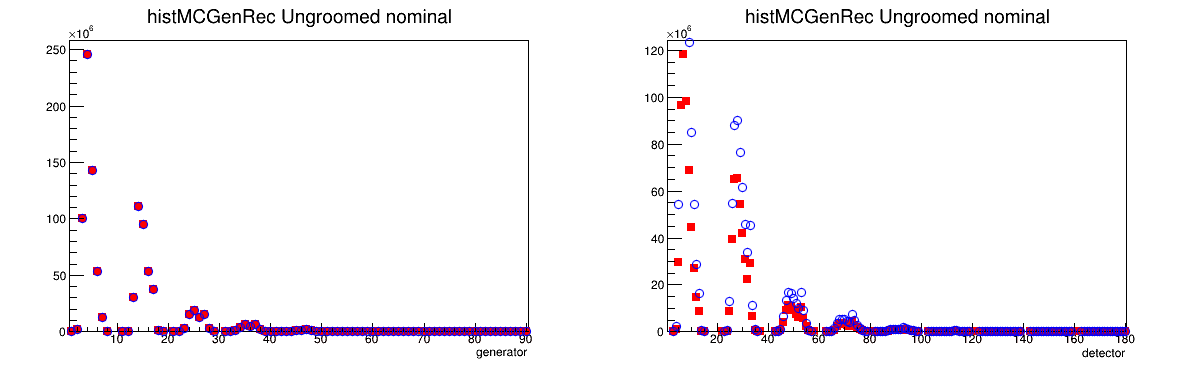

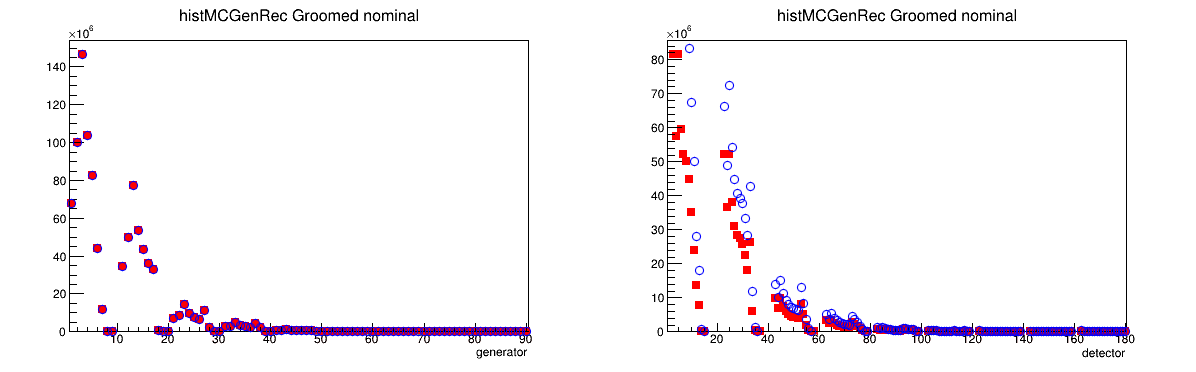

In [26]:
#### plot inputs to response matrix unrolled
hist = syst_hist_dict["nominal"]
c1 = plotinputsROOT(hist['MCGenRec_u'], hist['MCTruth_u'], DataReco_u, groom="ungroomed", syst="nominal", year=year, ospath=os_path)
c2 = plotinputsROOT(hist['MCGenRec_g'], hist['MCTruth_g'], DataReco_g, groom="groomed", syst="nominal", year=year, ospath=os_path)
c1.Show()

MCTruth ungroomed
histMCGenRec Ungroomed nominal
MCTruth groomed
histMCGenRec Groomed nominal


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cungroomed
Info in <TCanvas::Print>: png file plots/unfolding/dijet/testMCInput_ungroomed_nominalflatmatrixOnly.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cgroomed
Info in <TCanvas::Print>: png file plots/unfolding/dijet/testMCInput_groomed_nominalflatmatrixOnly.png has been created


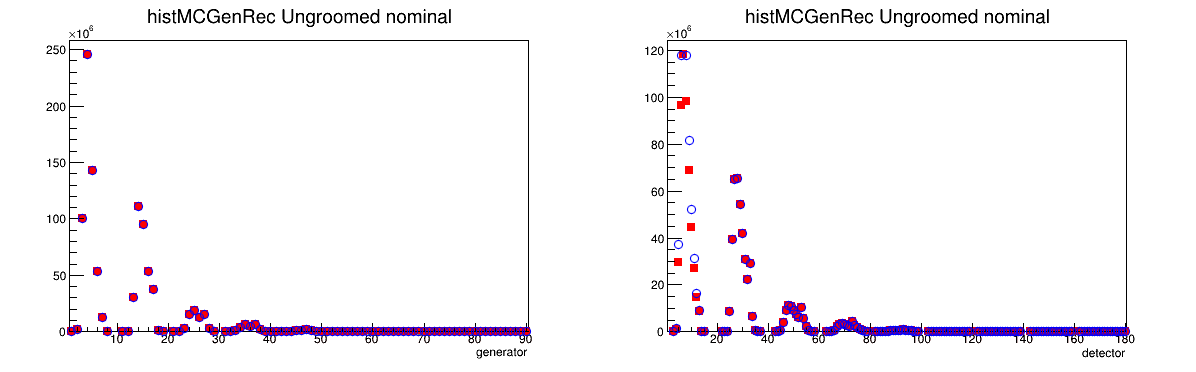

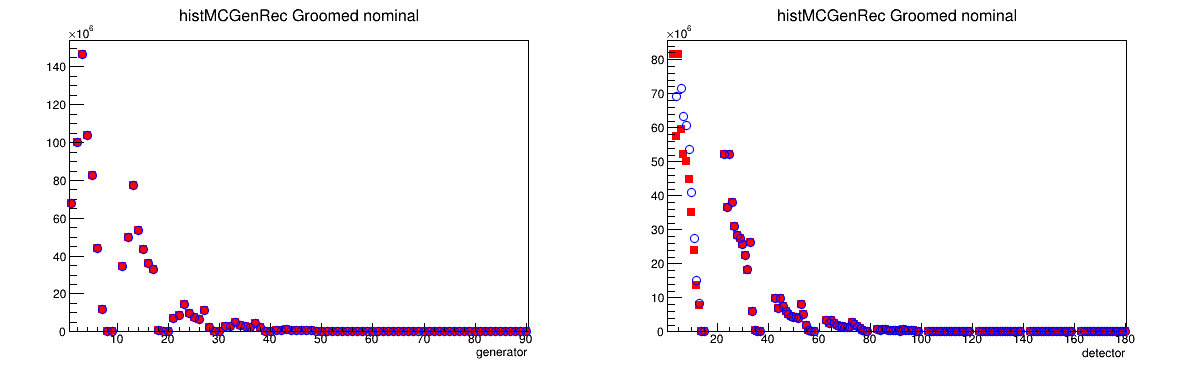

In [27]:
#### plot inputs to response matrix unrolled
hist = syst_hist_dict["nominal"]
c1 = plotinputsROOT(hist['MCGenRec_u'], hist['MCTruth_u'], hist['MCReco_u'], groom="ungroomed", syst="nominal", year=year, ospath=os_path)
c2 = plotinputsROOT(hist['MCGenRec_g'], hist['MCTruth_g'], hist['MCReco_g'], groom="groomed", syst="nominal", year=year, ospath=os_path)
c1.Show()

Info in <TCanvas::Print>: png file plots/unfolding/dijet/testRespMatrix_ungroomed_nominalOnly.png has been created


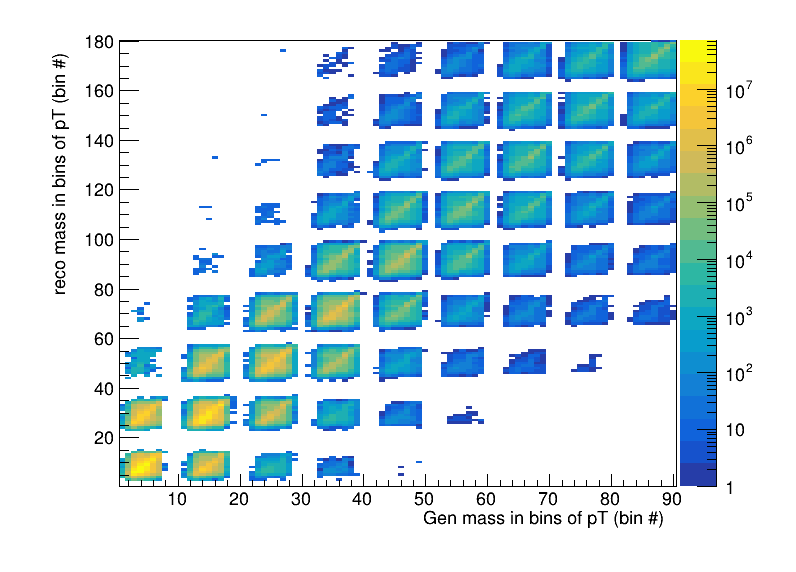

In [28]:
# -------------------------------------------------------------------------------------
# Draw response matrix
# -------------------------------------------------------------------------------------
M = syst_hist_dict["nominal"]["MCGenRec_u"]
c1 = ROOT.TCanvas("c1", "", 800, 600)
c1.SetTopMargin(0.07)
c1.SetRightMargin(0.15)
c1.SetBottomMargin(0.15)
c1.SetLeftMargin(0.15) 

M.SetTitle(";Gen mass in bins of pT (bin #);reco mass in bins of pT (bin #)")
M.GetZaxis()
M.Draw("colz")
c1.SetLogz()
c1.Draw()
c1.SaveAs(os_path+"RespMatrix_ungroomed_nominal"+year+".png")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file plots/unfolding/dijet/testRespMatrix_ungroomed_nominalOnly.png has been created


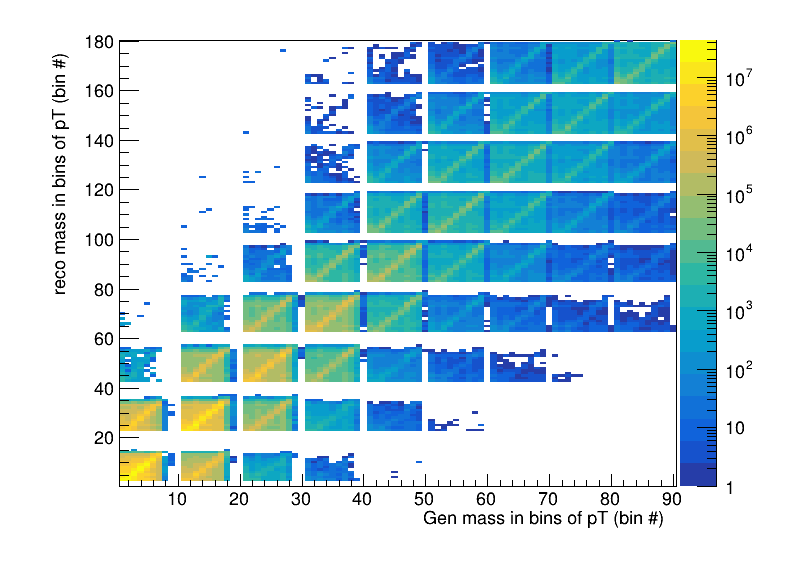

In [29]:
# -------------------------------------------------------------------------------------
# Draw response matrix
# -------------------------------------------------------------------------------------
M = syst_hist_dict["nominal"]["MCGenRec_g"]
c1 = ROOT.TCanvas("c1", "", 800, 600)
c1.SetTopMargin(0.07)
c1.SetRightMargin(0.15)
c1.SetBottomMargin(0.15)
c1.SetLeftMargin(0.15) 

M.SetTitle(";Gen mass in bins of pT (bin #);reco mass in bins of pT (bin #)")
M.GetZaxis()
M.Draw("colz")
c1.SetLogz()
c1.Draw()
c1.SaveAs(os_path+"RespMatrix_ungroomed_nominal"+year+".png")


[  200.   260.   350.   430.   540.   630.   690.   750.   810. 13000.]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: axes (Potential memory leak).
Error in <TAxis::SetBinLabel>: Illegal bin number: 0
Error in <TAxis::SetBinLabel>: Illegal bin number: 0
Info in <TCanvas::Print>: png file plots/unfolding/dijet/testRespMatrix_ungroomed_nominalOnly.png has been created


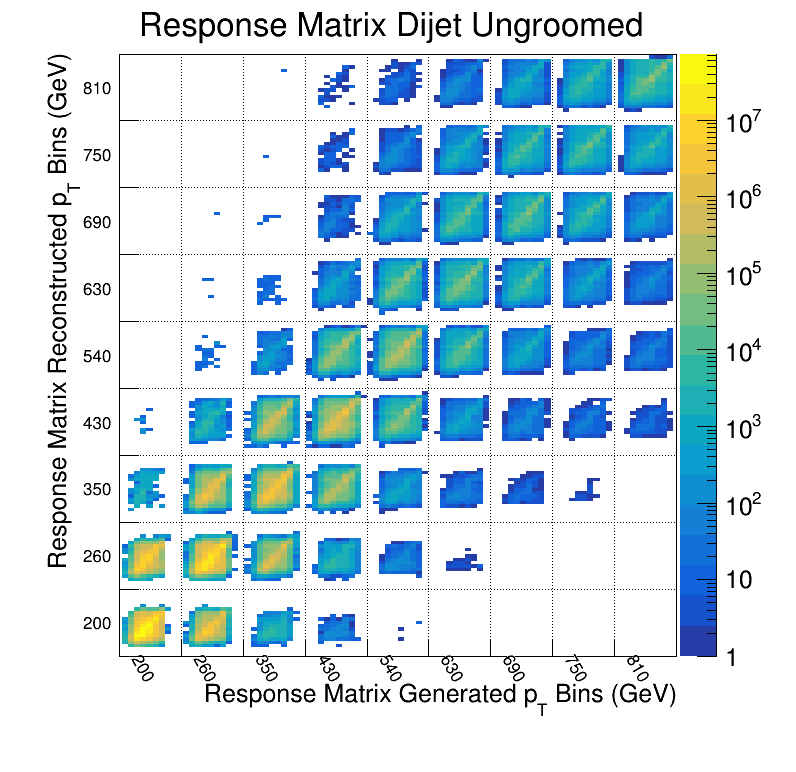

In [30]:
# -------------------------------------------------------------------------------------
# Draw response matrix pretty
# -------------------------------------------------------------------------------------
print(ptgen_edges)
### make M without fakes so can be drawn prettily
M = syst_hist_dict["nominal"]["MCGenRec_u"]
c1 = ROOT.TCanvas("c1", "response", 800, 800)
c1.Clear()
c1.SetTopMargin(0.07)
c1.SetRightMargin(0.15)
c1.SetBottomMargin(0.15)
c1.SetLeftMargin(0.15) 
M.GetZaxis()
M.Draw("colz")
#### set custom axis labels
# M.GetXaxis().SetRangeUser(, M.GetNbinsX())
# M.GetYaxis().SetRangeUser(2, M.GetNbinsY())
axislabels = ROOT.TH2F("axes", ";Reconstructed Bin;Generated Bin", len(ptgen_edges)-1, 0, M.GetNbinsX()+1, len(ptgen_edges)-1, 0, M.GetNbinsY()+1 )
for ibin in range(0,len(ptgen_edges)):
    axislabels.GetXaxis().SetBinLabel( ibin, str( int(ptgen_edges[ibin-1])) )
    axislabels.GetXaxis().ChangeLabel(ibin,300.,-1,-1)
    axislabels.GetYaxis().SetBinLabel( ibin, str( int(ptgen_edges[ibin-1])) )
c1.SetGrid()
axislabels.SetTitle("Response Matrix "+channel+" Ungroomed;Response Matrix Generated p_{T} Bins (GeV);Response Matrix Reconstructed p_{T} Bins (GeV)")
# axislabels.GetXaxis().SetNdivisions( 400+len(ptgen_edges)-1, False)
# axislabels.GetYaxis().SetNdivisions( 400+len(ptgen_edges)-1, False)
axislabels.Draw("axis")
axislabels.SetMaximum(M.GetBinContent(M.GetMaximumBin()))
axislabels.SetMinimum(1)
M.GetXaxis().SetLabelSize(0)
M.GetYaxis().SetLabelSize(0)
# M.GetXaxis().SetNdivisions( 400 + len(ptgen_edges), False)
# M.GetYaxis().SetNdivisions( 400 + len(ptgen_edges), False)
M.GetXaxis().SetTitleOffset(1.5)
M.GetYaxis().SetTitleOffset(1.5)
M.SetTitle("Dijet Response Ungroomed")
M.Draw("colz same")
c1.SetLogz()
c1.Draw()
c1.SaveAs(os_path+"RespMatrix_ungroomed_nominal"+year+".png")

[  200.   260.   350.   430.   540.   630.   690.   750.   810. 13000.]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: axes (Potential memory leak).
Error in <TAxis::SetBinLabel>: Illegal bin number: 0
Error in <TAxis::SetBinLabel>: Illegal bin number: 0
Info in <TCanvas::Print>: png file plots/unfolding/dijet/testRespMatrix_groomed_nominalOnly.png has been created


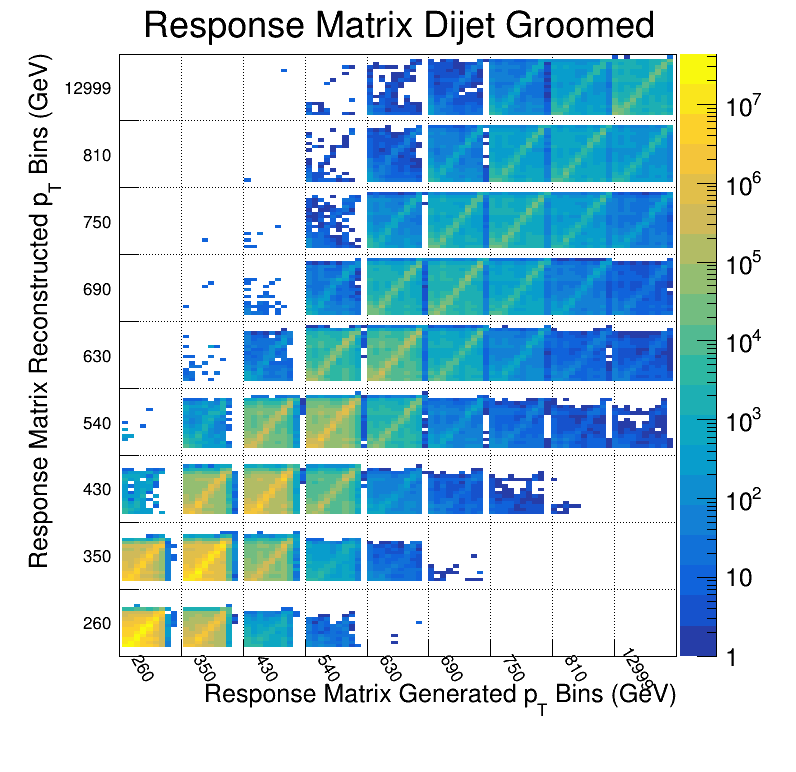

In [31]:
# -------------------------------------------------------------------------------------
# Draw response matrix pretty
# -------------------------------------------------------------------------------------
print(ptgen_edges)
### make M without fakes so can be drawn prettily
M = syst_hist_dict["nominal"]["MCGenRec_g"]
c1 = ROOT.TCanvas("c1", "response", 800, 800)
c1.Clear()
c1.SetTopMargin(0.07)
c1.SetRightMargin(0.15)
c1.SetBottomMargin(0.15)
c1.SetLeftMargin(0.15) 
M.GetZaxis()
M.Draw("colz")
#### set custom axis labels
# M.GetXaxis().SetRangeUser(2, M.GetNbinsX())
# M.GetYaxis().SetRangeUser(len(mreco_edges)+2, M.GetNbinsY())
axislabels = ROOT.TH2F("axes", ";Reconstructed Bin;Generated Bin", len(ptgen_edges)-1, 0, M.GetNbinsX()+1, len(ptgen_edges)-1, 0, M.GetNbinsY()+1 )
for ibin in range(len(ptgen_edges)):
    axislabels.GetXaxis().SetBinLabel( ibin, str( int(ptgen_edges[ibin])) )
    axislabels.GetXaxis().ChangeLabel(ibin,300.,-1,-1)
    axislabels.GetYaxis().SetBinLabel( ibin, str( int(ptgen_edges[ibin])) )
c1.SetGrid()
axislabels.SetTitle("Response Matrix "+channel+" Groomed;Response Matrix Generated p_{T} Bins (GeV);Response Matrix Reconstructed p_{T} Bins (GeV)")
# axislabels.GetXaxis().SetNdivisions( 400+len(ptgen_edges)-1, False)
# axislabels.GetYaxis().SetNdivisions( 400+len(ptgen_edges)-1, False)
axislabels.Draw("axis")
axislabels.SetMaximum(M.GetBinContent(M.GetMaximumBin()))
axislabels.SetMinimum(1)
M.GetXaxis().SetLabelSize(0)
M.GetYaxis().SetLabelSize(0)
# M.GetXaxis().SetNdivisions( 400 + len(ptgen_edges), False)
# M.GetYaxis().SetNdivisions( 400 + len(ptgen_edges), False)
M.GetXaxis().SetTitleOffset(1.5)
M.GetYaxis().SetTitleOffset(1.5)
M.Draw("colz same")
c1.SetLogz()
c1.Draw()
c1.SaveAs(os_path+"RespMatrix_groomed_nominal"+year+".png")

In [32]:
from matplotlib.lines import Line2D
print(list(Line2D.markers.keys()))
markers = ['.', ',', 'o', 'v', 's', 'p', '*', 'h', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'None', 'none', ' ', '']
def plotStackedOutput(htrue, u, groomed=False, norm=True, os_path='', channel='', IOV=''): #, oMat, oSys, oTotal):                                                 
    #### plotting options                                                                                                                                     
    tot_error_opts = {
            'facecolor': 'powderblue',
            'linewidth': 0
        }
    stat_error_opts = {
            'label': 'Stat. Unc.',
                    'hatch': '///',
                    'edgecolor': 'black',
            'facecolor': 'none',
            'linewidth': 0
        }
    data_err_opts = {
            'linestyle': 'none',
            'marker': '.',
            'markersize': 5.,
            'color': 'k',
            'elinewidth': 1,
        }
    #### u is total unfolding object, htrue is truth hist from coffea                                                                                         
    o = u.GetOutput("u")
    mCovInput = u.GetEmatrixInput("Input unc")
    inputErrTot = np.array([mCovInput.GetBinContent(i,i)**0.5 for i in range(0, o.GetNbinsX()+1)])
    ptedges = [bin[0] for bin in htrue.project("ptgen").axes[0]] + [htrue.project("ptgen").axes[0][-1][1]]
    print(ptedges)
    medges = [bin[0] for bin in htrue.project('mgen').axes[0]]+ [htrue.project('mgen').axes[0][-1][1]]
    widths = htrue.project("mgen").axes[0].widths
    xlim = medges[-1]
    #### set up figure                                                                                                                                    
    fig, ax= plt.subplots()
    ax.set_ylabel(r'$\frac{1}{d\sigma/dp_T}\frac{d^2\sigma}{dmdp_T} (GeV^{-1})$', loc = 'top')
    if groomed:
        ax.set_xlabel(r'$m_{SD} (GeV)$' )
    else: ax.set_xlabel(r'$m (GeV)$' )
    hep.cms.label("Simulation", year=IOV, data = False, loc=0, ax=ax, fontsize=18);
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylim(10**-6,10**14)
    ax.set_xlim(5., 500.)
    for ipt in range(len(ptedges)-1): 
        inputErr = np.array([inputErrTot[(im+1+ipt*(len(medges)-1))] for im in range(0, len(medges)-1)])
        oErr = np.array([o.GetBinError(im+1+ipt*(len(medges)-1)) for im in range(0, len(medges)-1)])
        oVals = np.array([o.GetBinContent(im+1+ipt*(len(medges)-1)) for im in range(0, len(medges)-1)])
        oHistVals = np.array([o.GetBinContent(im+1+ipt*(len(medges)-1)) for im in range(0, len(medges)-1)])
        oHistErr = oErr
        hist = htrue[{'ptgen':ipt, 'syst':"nominal"}].project("mgen")
        if norm:
            print("Check that sum of values ", np.sum(hist.values())," is same as integrate ", hist.integrate("mgen").value)
            hist = hist*1.0/hist.integrate("mgen").value
            oVals_sum = np.sum(oVals)
            oHistVals = oVals*1.0/oVals_sum
            oHistErr = oHistErr/oVals_sum
            #inputErr = inputErr*1.0/oVals_sum
            print("oVals after norm ", oVals, " by value ", np.sum(oVals)) 
        scale = 10**ipt
        histVals = hist.values()*scale
        oHistVals =  oHistVals*scale
        # ax.stairs(values=(mcvals.values()+stat_unc_up)/widths, edges = edges, baseline= (mcvals.values()-stat_unc_down)/widths,                             
        #         fill=True,                                                                                                                                  
        #         **stat_error_opts,                         
        #     )                                                                                                                                               
        hep.histplot(oHistVals/widths, medges, stack=False, histtype='errorbar', yerr = np.zeros_like(oHistErr),
                 ax=ax, marker=markers[ipt+2], color = 'Black',markersize=5.,
                 label=str(ptedges[ipt])+"-" +str(ptedges[ipt+1]) + r" GeV x $10^{}$".format(ipt))
        if ipt == 1:
            hep.histplot(histVals/widths, medges, stack=False, histtype='step',
                 ax=ax, linestyle ='--', color = 'Red', linewidth=1, label="MG + Herwig "+channel)
            ax.stairs(values=(oHistVals+oHistErr)/widths, edges = medges, baseline= (oHistVals-oHistErr)/widths,fill=True,
                **tot_error_opts,label="Stat. Unc."
            )
        else: 
            hep.histplot(histVals/widths, medges, stack=False, histtype='step',
                 ax=ax, linestyle ='--', color = 'Red', linewidth=1,)
            ax.stairs(values=(oHistVals+oHistErr)/widths, edges = medges, baseline= (oHistVals-oHistErr)/widths,
                fill=True,
                **tot_error_opts,
            )
        leg = ax.legend(loc=9, fontsize=14, labelspacing=0.25, ncol=2)
        leg.set_visible(True)
    if groomed: os_path=os_path+"Groomed"
    if norm:
        fig.savefig(os_path+"UnfoldOutputStackedPt_normed.png", bbox_inches="tight") 
    else:
        fig.savefig(os_path+"UnfoldOutputStackedPt.png", bbox_inches="tight") 

['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'None', 'none', ' ', '']


In [33]:
def plotUnfoldOutputHist(htrue, u, groomed=False, norm=True, os_path='', channel='', IOV=''): #, oMat, oSys, oTotal):                                                 
    #### plotting options                                                                                                                                     
    tot_error_opts = {
            'label': 'Stat. Unc.',
            'facecolor': 'powderblue',
            'linewidth': 0
        }
    stat_error_opts = {
            'label': 'Stat. Unc.',
                    'hatch': '///',
                    'edgecolor': 'black',
            'facecolor': 'none',
            'linewidth': 0
        }
    data_err_opts = {
            'linestyle': 'none',
            'marker': '.',
            'markersize': 10.,
            'color': 'k',
            'elinewidth': 1,
        }
    #### u is total unfolding object, htrue is truth hist from coffea                                                                                         
    o = u.GetOutput("u")
    mCovInput = u.GetEmatrixInput("Input unc")
    inputErrTot = np.array([mCovInput.GetBinContent(i,i)**0.5 for i in range(0, o.GetNbinsX()+1)])
    ptedges = [bin[0] for bin in htrue.project("ptgen").axes[0]] + [htrue.project("ptgen").axes[0][-1][1]]
    print(ptedges)
    medges = [bin[0] for bin in htrue.project('mgen').axes[0]]+ [htrue.project('mgen').axes[0][-1][1]]
    print(medges)
    widths = htrue.project("mgen").axes[0].widths
    xlim = medges[-1]
    if groomed: os_path=os_path+"Groomed"
    for ipt in range(len(ptedges)-1):
        inputErr = np.array([inputErrTot[(im+1+ipt*(len(medges)-1))] for im in range(len(medges)-1)])
        oErr = np.array([o.GetBinError(im+1+ipt*(len(medges)-1)) for im in range(len(medges)-1)])
        oVals = np.array([o.GetBinContent(im+1+ipt*(len(medges)-1)) for im in range(len(medges)-1)])
        oHistVals = np.array([o.GetBinContent(im+1+ipt*(len(medges)-1)) for im in range(len(medges)-1)])
        oHistErr = oErr
        hist = htrue[{'ptgen':ipt, 'syst':"nominal"}].project("mgen")
        #### set up figure                                                                                                                                    
        fig, (ax, rax) = plt.subplots(
                nrows=2,
                ncols=1,
                figsize=(7,7),
                gridspec_kw={"height_ratios": (3, 1)},
                sharex=True)
        ax.set_ylabel(r'$\frac{1}{d\sigma/dp_T}\frac{d^2\sigma}{dmdp_T} (GeV^{-1})$', loc = 'top')
        ax.text(0.60, 0.70, str(ptedges[ipt])+r"$<p_{T}<$" +str(ptedges[ipt+1]) + " GeV",
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes,
        color='green', fontsize=14)
        rax.set_ylim(0.5, 2)
        ax.set_xlim(5, 1000.)
        ax.set_yscale('log')
        rax.set_xlim(5, 1000.)
        hep.cms.label("Preliminary", year=IOV, data = True, loc=0, ax=ax, fontsize=18);
        if groomed:
            ax.set_xlabel(r'$m_{SD} (GeV)$' )
        if norm:
            print("Check that sum of values ", np.sum(hist.values())," is same as integrate ", hist.integrate("mgen").value)
            hist = hist*1.0/hist.integrate("mgen").value
            oVals_sum = np.sum(oVals)
            oHistVals = oVals*1.0/oVals_sum
            oHistErr = np.sqrt(oVals)/oVals_sum
            #inputErr = inputErr*1.0/oVals_sum
            print("oVals after norm ", oVals, " by value ", np.sum(oVals))
        ratio = np.divide(hist.values(),oHistVals,
                      out=np.empty(np.array(hist.project("mgen").values()).shape).fill(1),
                      where= oHistVals!=0,)
        # ratio_staterr_up = np.divide(mcvals.values()+stat_unc_up+syst_unc_up,datavals.values(),                                                             
        #               out=np.empty(np.array(mcvals.values()).shape).fill(np.nan),                                                                           
        #               where=datavals.values()!= 0,)                                                                                                         
        # ratio_staterr_down = np.divide(mcvals.values()-stat_unc_down-syst_unc_down,datavals.values(),                                                       
        #               out=np.empty(np.array(mcvals.values()).shape).fill(np.nan),                                                                           
        #               where=datavals.values()!= 0,)         
        ratio_toterr_up = np.divide(oHistVals+oHistErr,oHistVals,
                      out=np.empty(np.array(oVals.shape)).fill(np.nan),
                      where=oHistVals!= 0,)
        ratio_toterr_down = np.divide(oHistVals-oHistErr,oHistVals,
                      out=np.empty(np.array(oVals.shape)).fill(np.nan),
                      where=oHistVals!= 0,)
        ratio_err = np.abs(np.divide(oHistErr,oHistVals,
                      out=np.empty(np.array(oVals.shape)).fill(np.nan),
                      where=oHistVals!= 0,))
        rax.stairs(values=ratio_toterr_up, edges = medges, baseline= ratio_toterr_down,
                fill=True,
                **tot_error_opts,
            )
        # rax.stairs(values=ratio_statterr_up, edges = medges, baseline= ratio_statterr_down,                                                                 
        #         fill=True,                                                                                                                                  
        #         **stat_error_opts,                                                                                                                          
        #     )                                                                                                                                               
        ax.stairs(values=(oHistVals+oHistErr)/widths, edges = medges, baseline= (oHistVals-oHistErr)/widths,
                fill=True,
                **tot_error_opts,
            )
        # ax.stairs(values=(mcvals.values()+stat_unc_up)/widths, edges = edges, baseline= (mcvals.values()-stat_unc_down)/widths,                             
        #         fill=True,                                                                                                                                  
        #         **stat_error_opts,                         
        #     )                                                                                                                                               
        hep.histplot(oHistVals, medges, stack=False, histtype='errorbar', yerr = abs(oHistErr),
                 ax=ax, marker =["."], color = 'Black', linewidth=1, binwnorm=True,
                 label="Unfolded "+channel+" Data")
        hep.histplot(hist, stack=False, histtype='step',
                 ax=ax, linestyle ='--', color = 'Black', linewidth=1, binwnorm=True,
                     label="Truth "+channel)
        hep.histplot(ratio, medges, histtype='step', ax=rax, linestyle ="--", color = 'black', linewidth=1)
        hep.histplot(np.ones_like(ratio), medges, histtype='errorbar',ax=rax,marker=['.'], color = 'black', linewidth=1, yerr = ratio_err)
        leg = ax.legend(loc='best', fontsize=14, labelspacing=0.25)
        leg.set_visible(True)
        if norm:
            fig.savefig(os_path+"UnfoldOutputRatioPt{}_{}_normed.png".format(ptedges[ipt], ptedges[ipt+1]), bbox_inches="tight") 
        else:
            fig.savefig(os_path+"UnfoldOutputRatioPt{}_{}.png".format(ptedges[ipt], ptedges[ipt+1]), bbox_inches="tight") 

Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used


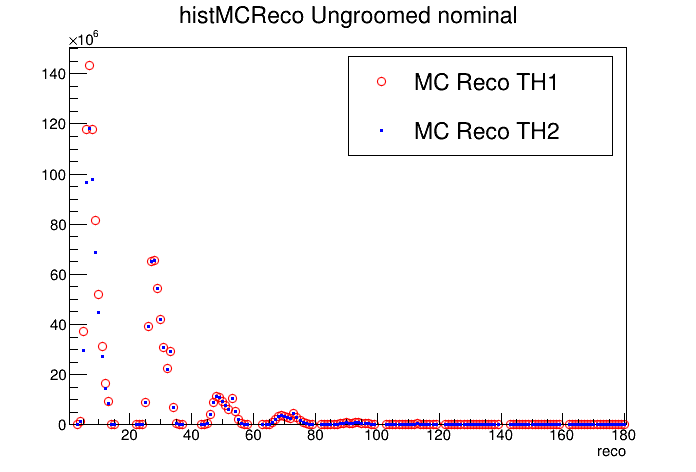

In [34]:
h_M = syst_hist_dict["nominal"]["MCGenRec_u"].ProjectionY("Reco ungroomed nom")
h = syst_hist_dict["nominal"]["MCReco_u"]
a1 = ROOT.TCanvas()
h.SetMarkerColor(ROOT.kRed)
h.SetMarkerStyle(4)
h_M.SetMarkerColor(ROOT.kBlue)
h_M.SetMarkerStyle(7)
h.Draw("e")
h_M.Draw("e same")
leg = ROOT.TLegend(0.9,0.9,0.9,0.9)
leg.AddEntry(h, "MC Reco TH1", "p")
leg.AddEntry(h_M, "MC Reco TH2", "p")
leg.Draw()
a1.Draw()

Info in <TUnfold::SetConstraint>: fConstraint=1
Warning in <TUnfold::TUnfold>: 6 output bins do not depend on the input data  0 9-10 20 30 91
Info in <TUnfold::TUnfold>: 180 input bins and 86 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (xaxis:Gen mass in bins of pT (bin #)[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #9 (xaxis:Gen mass in bins of pT (bin #)[8.5,9.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #10 (xaxis:Gen mass in bins of pT (bin #)[9.5,10.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #20 (xaxis:Gen mass in bins of pT (bin #)[19.5,20.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #30 (xaxis:Gen mass in bins of pT (bin #)[29.5,30.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #91 (xaxis:Gen mass in bins of pT (bin #)[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing xaxis regMode=3 densityMode=3 axisSteering=*[UOB]
Info in <TUnfold::SetConstraint>: fConstrai

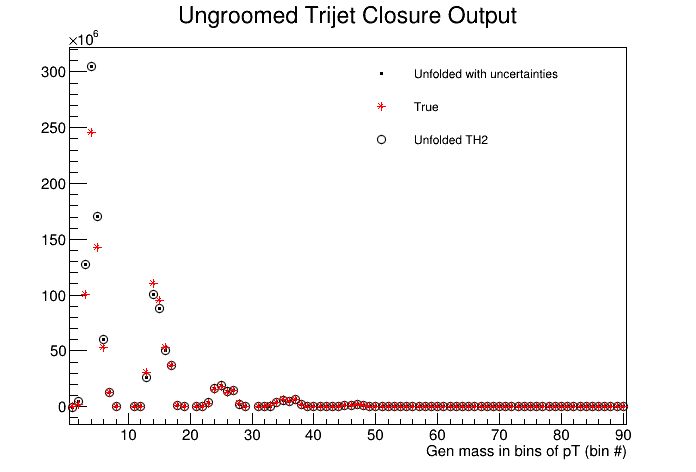

In [35]:
#### do closure test for ungroomed
M = syst_hist_dict["nominal"]["MCGenRec_u"]
M.SetName("Matrix to unfold")
orientation = ROOT.TUnfold.kHistMapOutputHoriz
regMode = ROOT.TUnfold.kRegModeCurvature
con = ROOT.TUnfold.kEConstraintArea
mode =  ROOT.TUnfoldDensity.kDensityModeBinWidth
axisSteering =  "*[b]"
u = ROOT.TUnfoldDensity(M,orientation,regMode,con)
u_M = ROOT.TUnfoldDensity(M,orientation,regMode,con)
# for syst in [syst for syst in availSysts if syst!="nominal"]:
#     u.AddSysError(syst_hist_dict[syst]["MCGenRec_u"], syst, orientation,  ROOT.TUnfoldDensity.kSysErrModeMatrix)
u.SetInput(h)
u.DoUnfold(0.0)
o=u.GetOutput("Ungroomed Trijet Closure Output")
u_M.SetInput(h)
u_M.DoUnfold(0.0)
o_M=u.GetOutput("Ungroomed Trijet Closure Output")
o.SetMarkerStyle(7)
o.SetLineColor(ROOT.kBlack)
o_M.SetMarkerStyle(4)
o_M.SetLineColor(ROOT.kBlue)
htrue = syst_hist_dict["nominal"]["MCGenRec_u"].ProjectionX("Gen ungroomed")
# htrue = syst_hist_dict["nominal"]["MCTruth_u"]
htrue.SetMarkerStyle(3)
htrue.SetMarkerColor(2)

a = ROOT.TCanvas()
o.Draw("e")
o_M.Draw("e same")
htrue.Draw("e same")
leg = ROOT.TLegend(0.9,0.9,0.9,0.9)
legstr = "Unfolded with uncertainties"
leg.AddEntry(o, legstr, "p")
leg.AddEntry(htrue, "True", "p")
leg.AddEntry(o_M, "Unfolded TH2", "p")
leg.SetBorderSize(0)
leg.Draw()
a.Draw()
a.SaveAs(os_path+"ClosureOutput_allbins"+year+".png")


[200.0, 260.0, 350.0, 430.0, 540.0, 630.0, 690.0, 750.0, 810.0, 13000.0]
[0.0, 10.0, 20.0, 40.0, 60.0, 80.0, 100.0, 150.0, 200.0, 300.0, 1300.0]
Check that sum of values  556860100.53785  is same as integrate  556860100.53785
oVals after norm  [-5.06294439e+05  4.67165513e+06  1.27724892e+08  3.05167162e+08
  1.70337120e+08  6.02034047e+07  1.25326129e+07  1.08909401e+04
  0.00000000e+00  0.00000000e+00]  by value  680141443.021213


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_20074/1320953682.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  328573052.3116841  is same as integrate  328573052.3116841
oVals after norm  [ 9.97226195e+03 -8.04851579e+03  2.60921292e+07  1.00914683e+08
  8.81495157e+07  5.04664968e+07  3.73100366e+07  8.57015312e+05
 -8.77619564e+03  0.00000000e+00]  by value  303783023.9490171


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_20074/1320953682.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  67901159.12772466  is same as integrate  67901159.12772465
oVals after norm  [-1.00194693e+03  1.07602309e+05  3.89087666e+06  1.61097977e+07
  1.93328345e+07  1.33138922e+07  1.50194241e+07  2.48785194e+06
  3.98700474e+04  0.00000000e+00]  by value  70301147.5553672


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_20074/1320953682.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  25263741.472797558  is same as integrate  25263741.472797558
oVals after norm  [ 3.00237463e+02  1.10205802e+04  6.04969625e+05  3.94884800e+06
  5.98903222e+06  4.78765911e+06  6.70391132e+06  2.46630768e+06
  3.87405890e+05 -2.16668339e+01]  by value  24899432.995899305


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_20074/1320953682.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  6119255.144640102  is same as integrate  6119255.144640102
oVals after norm  [6.01713710e+02 1.06169822e+03 1.56445587e+05 6.86058794e+05
 1.23092367e+06 1.14662518e+06 1.72949715e+06 8.35367039e+05
 3.85072369e+05 1.44973462e+03]  by value  6173102.937496023
Check that sum of values  1861933.005963205  is same as integrate  1861933.0059632047
oVals after norm  [1.08418436e+01 6.72421487e+02 1.30079003e+04 1.58477883e+05
 3.32863792e+05 3.27032749e+05 5.30239590e+05 2.80649843e+05
 1.91846104e+05 4.95112741e+03]  by value  1839752.2531766447
Check that sum of values  1063330.2805776803  is same as integrate  1063330.2805776803
oVals after norm  [2.98532301e+01 3.84906342e+02 2.58193034e+04 9.37371673e+04
 1.62961919e+05 1.85386409e+05 3.01065920e+05 1.64486313e+05
 1.34277017e+05 1.06819327e+04]  by value  1078830.7414584483
Check that sum of values  632042.1655658305  is same as integrate  632042.1655658305
oVals after norm  [ 8.09826205e+00 -1.47099642e+03  

/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_20074/1320953682.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  906292.0128059431  is same as integrate  906292.1278831678
oVals after norm  [3.75011033e+02 9.64759725e+01 1.10622818e+04 5.34018079e+04
 1.08296011e+05 1.36390799e+05 2.49080834e+05 1.43354163e+05
 1.48704369e+05 5.88621966e+04]  by value  909623.94870475


Warning in <TROOT::Append>: Replacing existing TH1: u (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Input unc (Potential memory leak).


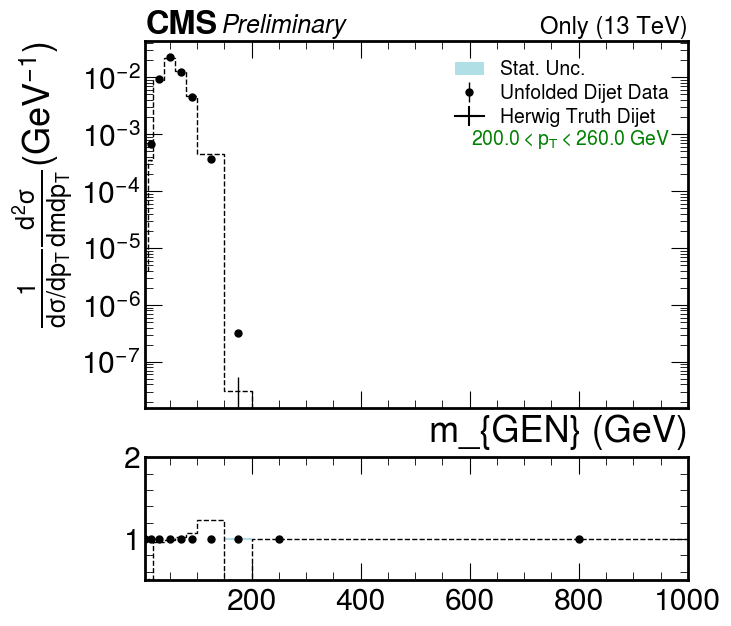

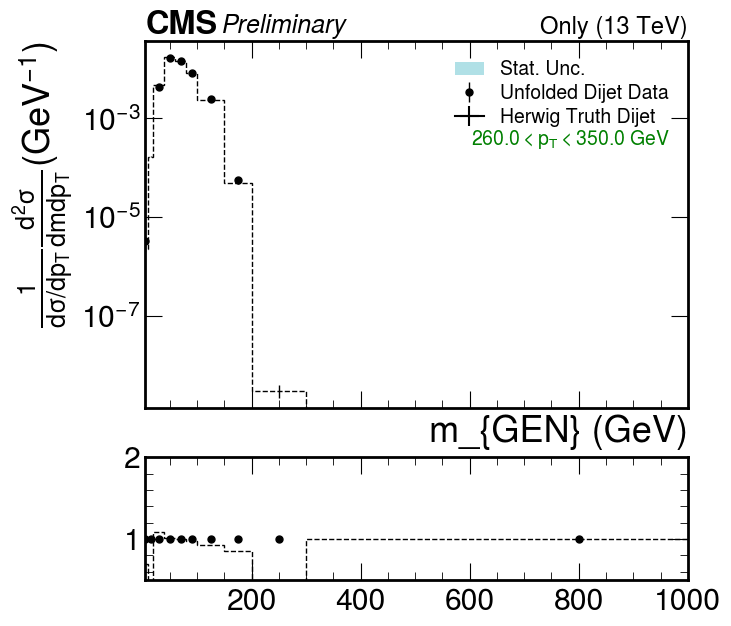

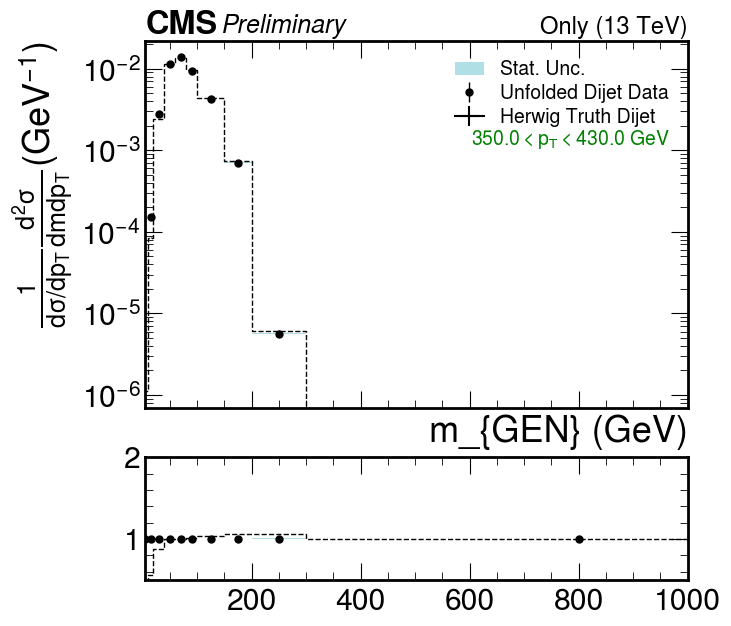

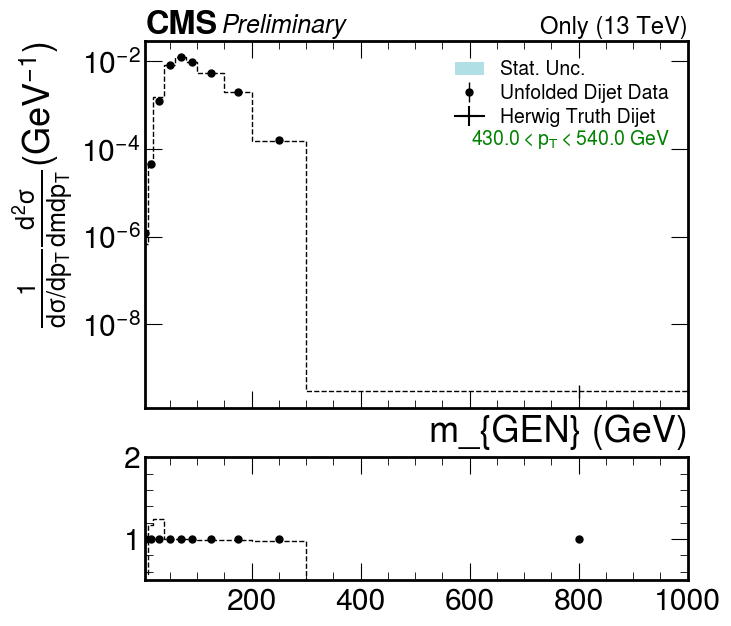

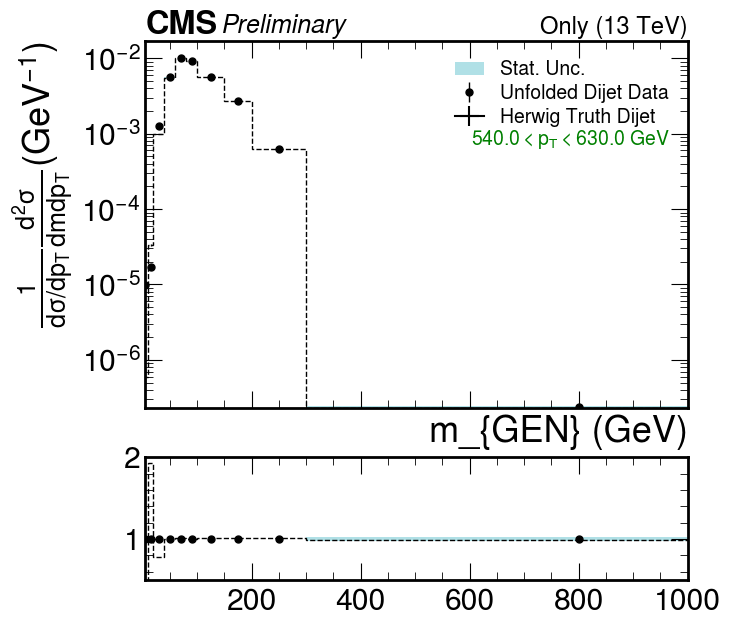

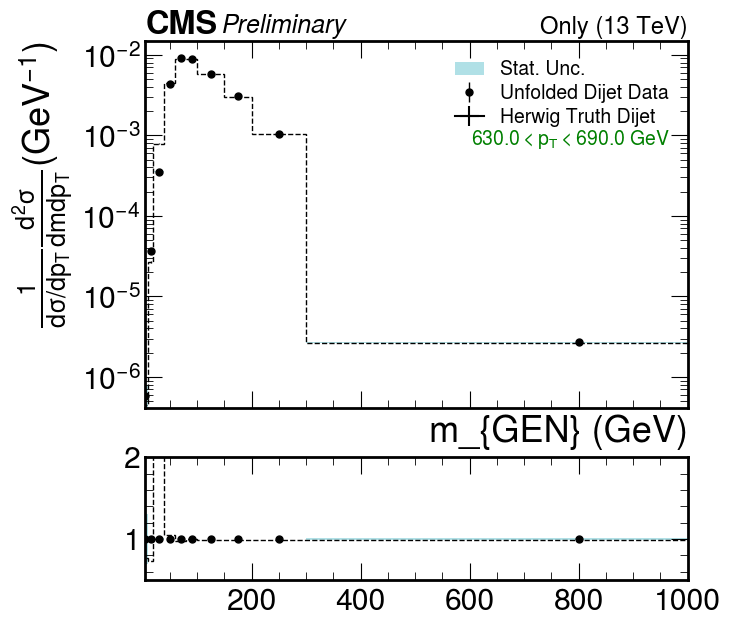

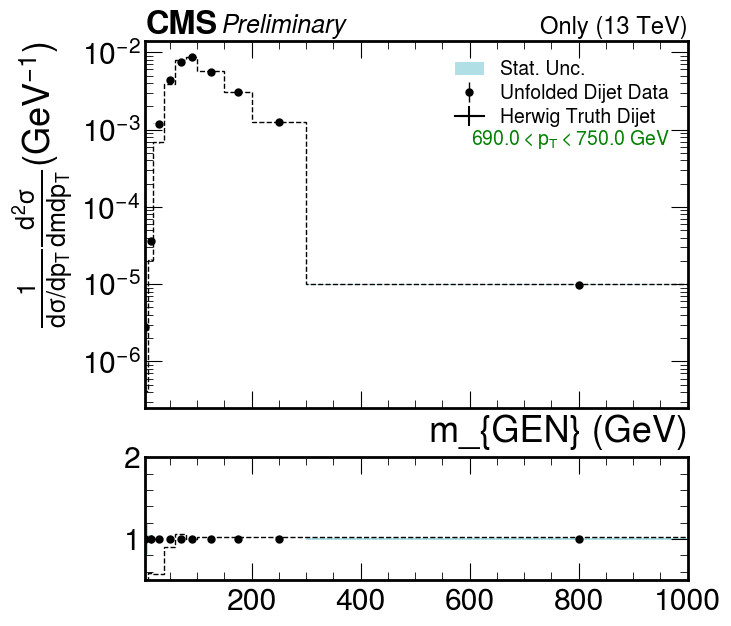

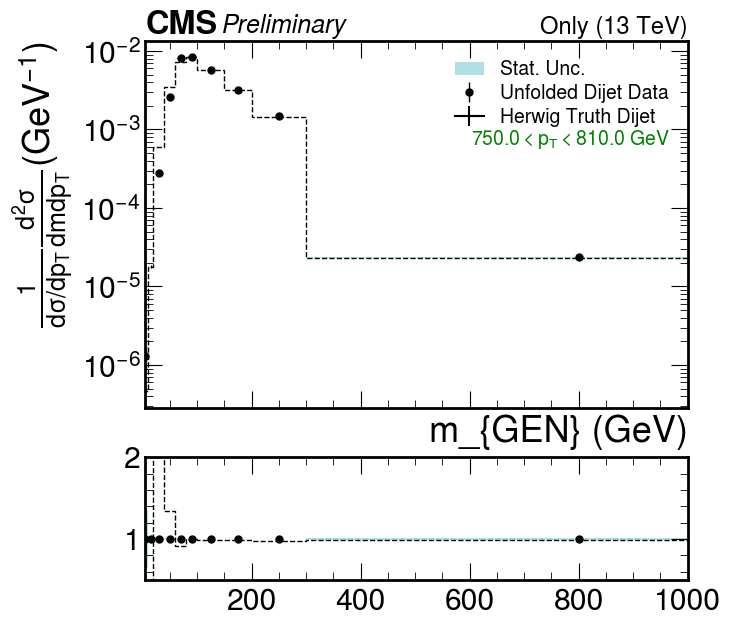

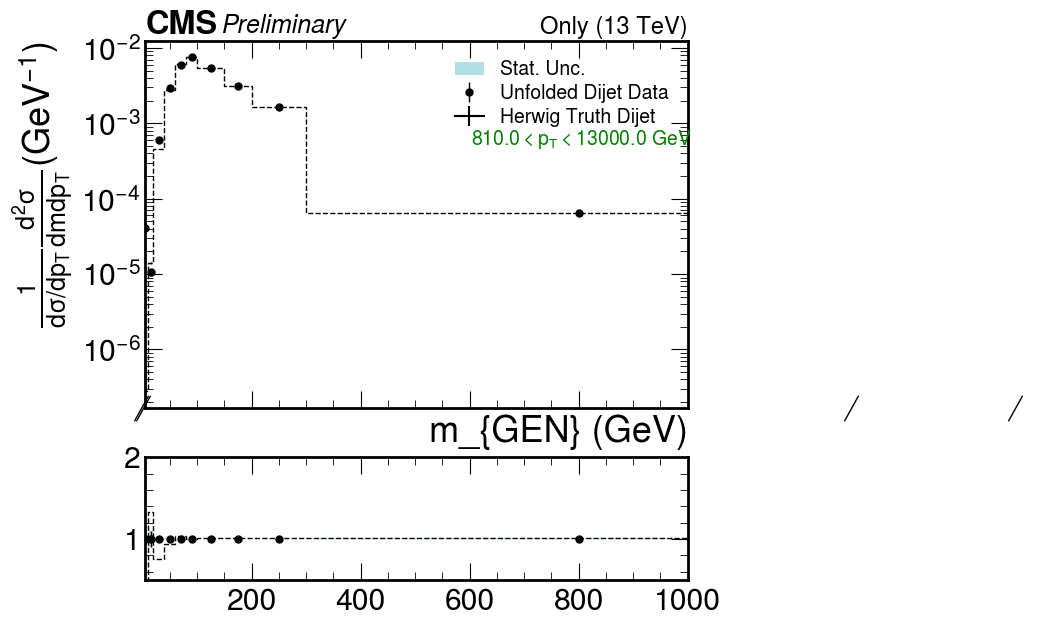

In [36]:
plotUnfoldOutputHist(result["response_matrix_u"], u, channel = channel, os_path=os_path+"Closure", IOV=year)

[200.0, 260.0, 350.0, 430.0, 540.0, 630.0, 690.0, 750.0, 810.0, 13000.0]
Check that sum of values  556860100.53785  is same as integrate  556860100.53785
oVals after norm  [-5.06294439e+05  4.67165513e+06  1.27724892e+08  3.05167162e+08
  1.70337120e+08  6.02034047e+07  1.25326129e+07  1.08909401e+04
  0.00000000e+00  0.00000000e+00]  by value  680141443.021213
Check that sum of values  328573052.3116841  is same as integrate  328573052.3116841
oVals after norm  [ 9.97226195e+03 -8.04851579e+03  2.60921292e+07  1.00914683e+08
  8.81495157e+07  5.04664968e+07  3.73100366e+07  8.57015312e+05
 -8.77619564e+03  0.00000000e+00]  by value  303783023.9490171
Check that sum of values  67901159.12772466  is same as integrate  67901159.12772465
oVals after norm  [-1.00194693e+03  1.07602309e+05  3.89087666e+06  1.61097977e+07
  1.93328345e+07  1.33138922e+07  1.50194241e+07  2.48785194e+06
  3.98700474e+04  0.00000000e+00]  by value  70301147.5553672
Check that sum of values  25263741.472797558 

Warning in <TROOT::Append>: Replacing existing TH1: u (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Input unc (Potential memory leak).


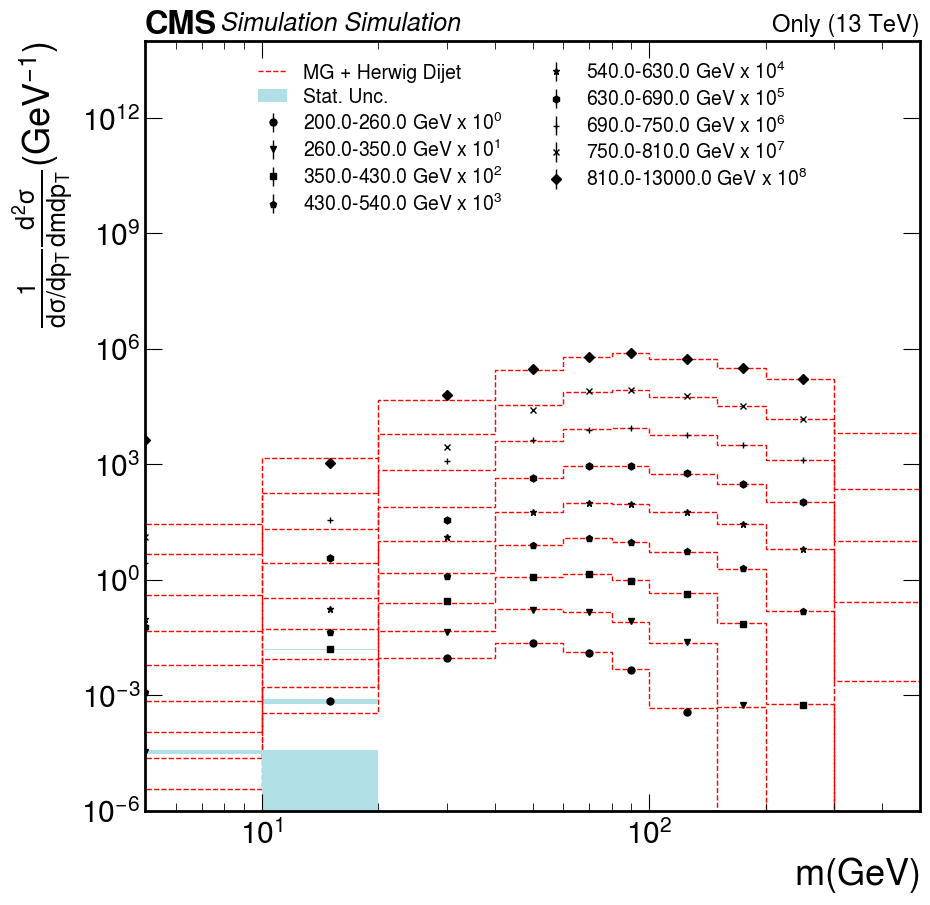

In [37]:
plotStackedOutput(result["response_matrix_u"], u, channel = channel, os_path=os_path+"Closure",IOV=year)

Info in <TUnfold::SetConstraint>: fConstraint=1
Warning in <TUnfold::TUnfold>: 3 output bins do not depend on the input data  0 10 91
Info in <TUnfold::TUnfold>: 180 input bins and 89 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (xaxis:Gen mass in bins of pT (bin #)[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #10 (xaxis:Gen mass in bins of pT (bin #)[9.5,10.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #91 (xaxis:Gen mass in bins of pT (bin #)[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing xaxis regMode=3 densityMode=3 axisSteering=*[UOB]
Warning in <TUnfoldDensity::SetInput>: 33/180 input bins have zero error, and are ignored.
Warning in <TROOT::Append>: Replacing existing TH1: Groomed Dijet Closure Output (Potential memory leak).
Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used
Info in <TCanvas::Print>: png file plots/unfolding/dijet/testGroomedClosureOu

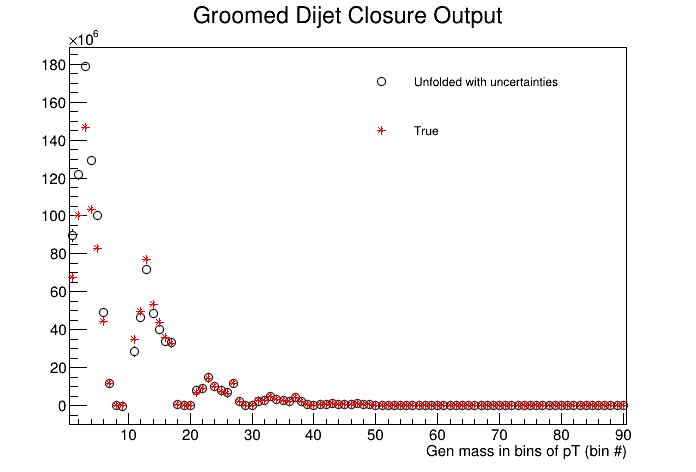

In [38]:
#### do closure test for groomed
M = syst_hist_dict["nominal"]["MCGenRec_g"]
M.SetName("Matrix to unfold")
h = syst_hist_dict["nominal"]["MCGenRec_g"].ProjectionY("Reco groomed")
h = syst_hist_dict["nominal"]["MCReco_g"]
h.SetName("Reco")
orientation = ROOT.TUnfold.kHistMapOutputHoriz
regMode = ROOT.TUnfold.kRegModeCurvature
con = ROOT.TUnfold.kEConstraintArea
mode =  ROOT.TUnfoldDensity.kDensityModeBinWidth
axisSteering =  "*[b]"
u = ROOT.TUnfoldDensity(M,orientation,regMode,con)
for syst in [syst for syst in availSysts if syst!="nominal"]:
    u.AddSysError(syst_hist_dict[syst]["MCGenRec_g"], syst, orientation,  ROOT.TUnfoldDensity.kSysErrModeMatrix)
u.SetInput(h)
u.DoUnfold(0.0)
o=u.GetOutput("Groomed "+channel+" Closure Output")
o.SetMarkerStyle(4)
o.SetLineColor(ROOT.kBlack)
# htrue = syst_hist_dict["nominal"]["MCGenRec_g"].ProjectionX("Gen groomed")
htrue = syst_hist_dict["nominal"]["MCTruth_g"]
htrue.SetMarkerStyle(3)
htrue.SetMarkerColor(2)

a = ROOT.TCanvas()
o.Draw("e")
htrue.Draw("e same")
leg = ROOT.TLegend(0.9,0.9,0.9,0.9)
legstr = "Unfolded with uncertainties"
leg.AddEntry(o, legstr, "p")
leg.AddEntry(htrue, "True", "p")
leg.SetBorderSize(0)
leg.Draw()
a.Draw()
a.SaveAs(os_path+"GroomedClosureOutput_allbins"+year+".png")


[200.0, 260.0, 350.0, 430.0, 540.0, 630.0, 690.0, 750.0, 810.0, 13000.0]
[0.0, 10.0, 20.0, 40.0, 60.0, 80.0, 100.0, 150.0, 200.0, 300.0, 1300.0]
Check that sum of values  556834083.7605749  is same as integrate  556860100.5378501
oVals after norm  [ 8.94731038e+07  1.21761923e+08  1.78912367e+08  1.29240923e+08
  1.00257593e+08  4.93304487e+07  1.16182380e+07  7.46896467e+03
 -2.60406541e+05  0.00000000e+00]  by value  680341658.417506


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_20074/1320953682.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  328552476.56509465  is same as integrate  328573052.311684
oVals after norm  [2.83163700e+07 4.65228334e+07 7.18336455e+07 4.86566248e+07
 4.01939022e+07 3.40071332e+07 3.30699707e+07 8.00816753e+05
 1.52932238e+03 5.80778473e+04]  by value  303460903.6458142
Check that sum of values  67893355.69562493  is same as integrate  67901159.12772468
oVals after norm  [ 8009085.14651612  8982916.05098021 14659942.53021256 10194919.78457173
  8002897.47793849  6783676.12852884 11458023.12296777  2318157.16472065
    40138.14880929    15916.58141536]  by value  70465672.13666102
Check that sum of values  25259858.34764176  is same as integrate  25263741.47279756
oVals after norm  [ 2.36531597e+06  2.88611446e+06  4.79571832e+06  3.30385159e+06
  2.51723348e+06  2.10357240e+06  4.27969371e+06  2.22013842e+06
  3.74315266e+05 -8.79905147e+02]  by value  24845073.718383785


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_20074/1320953682.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  6117971.831141926  is same as integrate  6119255.144640102
oVals after norm  [ 696656.65660395  676785.02438046 1084678.61238228  744965.00400103
  566577.06293605  463393.57053106  922346.02209982  665788.86112453
  363553.59724404    1547.79185977]  by value  6186292.203163005
Check that sum of values  1861438.37272441  is same as integrate  1861933.0059632051
oVals after norm  [211579.48791646 184560.22487199 303576.03303061 211198.43618314
 160889.36806696 129414.05036987 255587.56873672 202115.85131326
 175752.83602933   4885.31849853]  by value  1839559.1750168693
Check that sum of values  1063019.900109099  is same as integrate  1063330.2805776803
oVals after norm  [138840.54226403 111568.4344011  170963.3168454  116637.32094451
  88590.56122727  71680.18687375 137700.54665256 108746.71985853
 119472.41369971  10388.32182118]  by value  1074588.3645880555
Check that sum of values  631827.6062470414  is same as integrate  632042.1655658305
oVals after no

Warning in <TROOT::Append>: Replacing existing TH1: u (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Input unc (Potential memory leak).


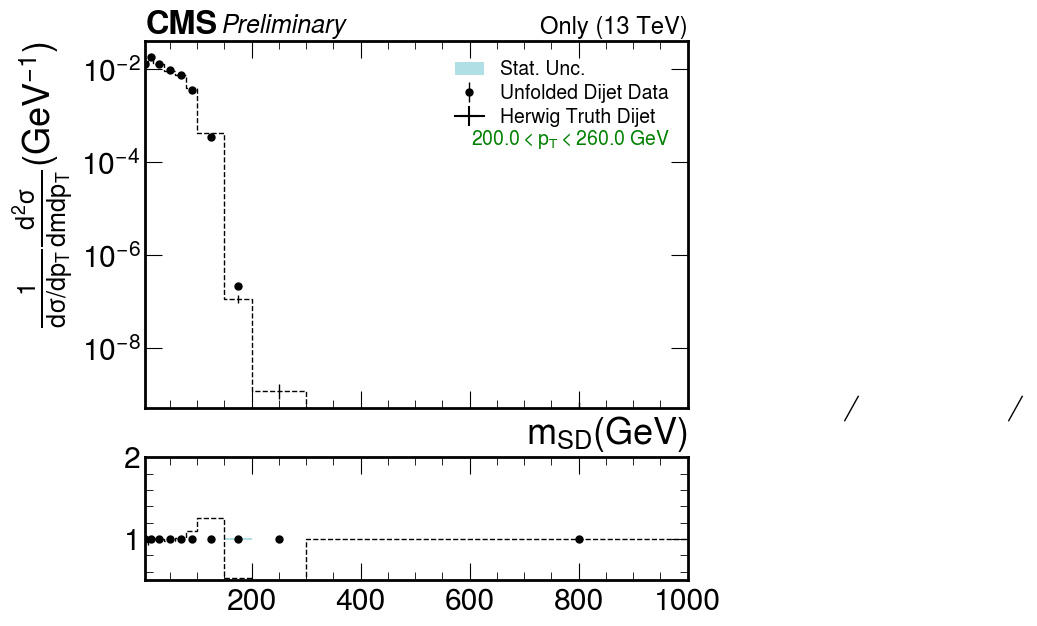

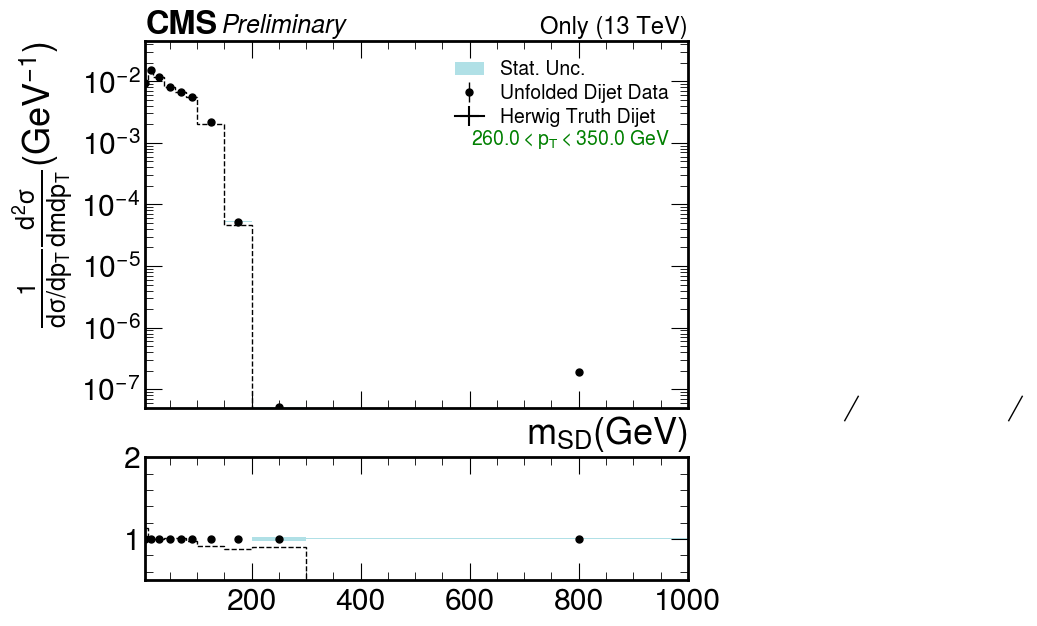

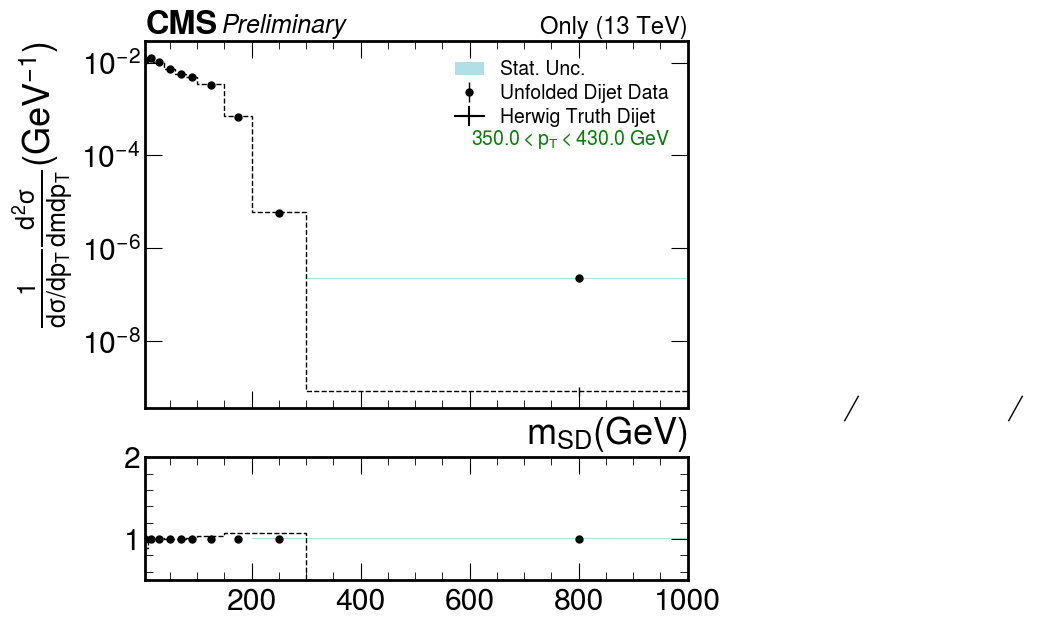

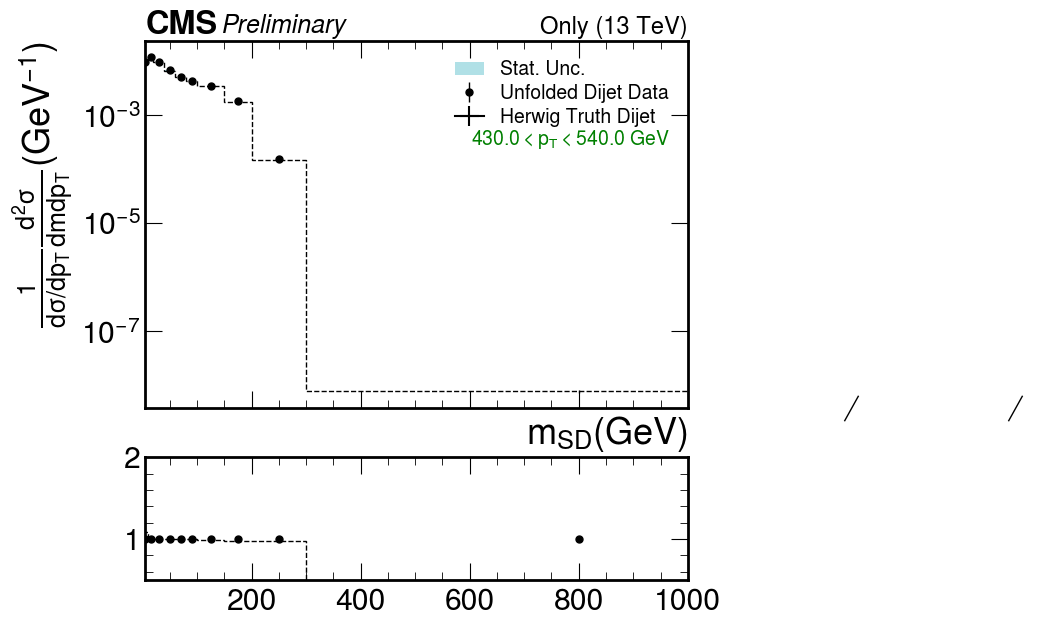

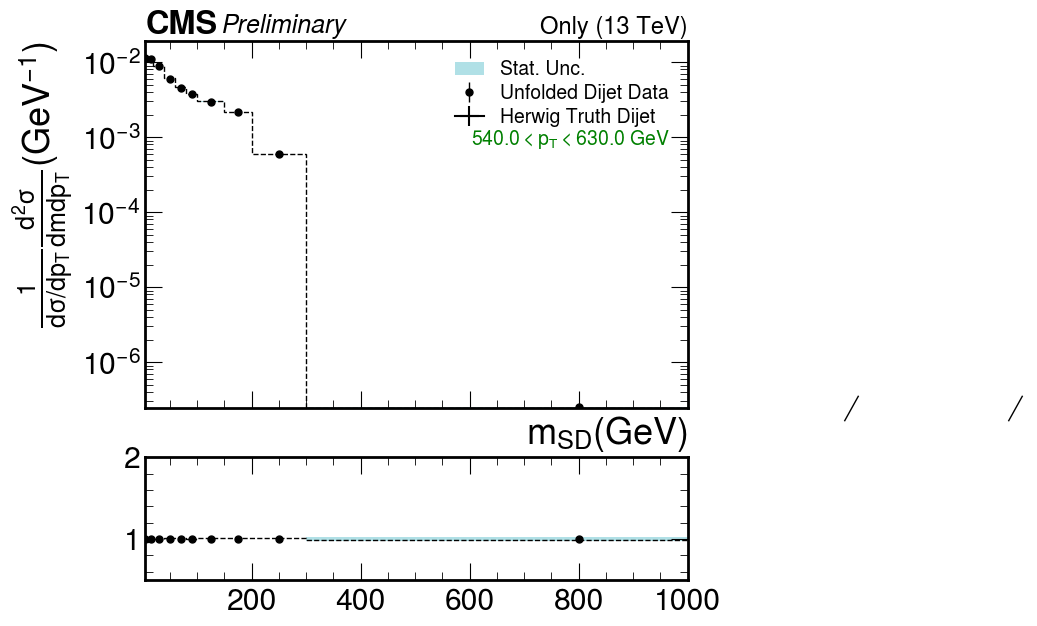

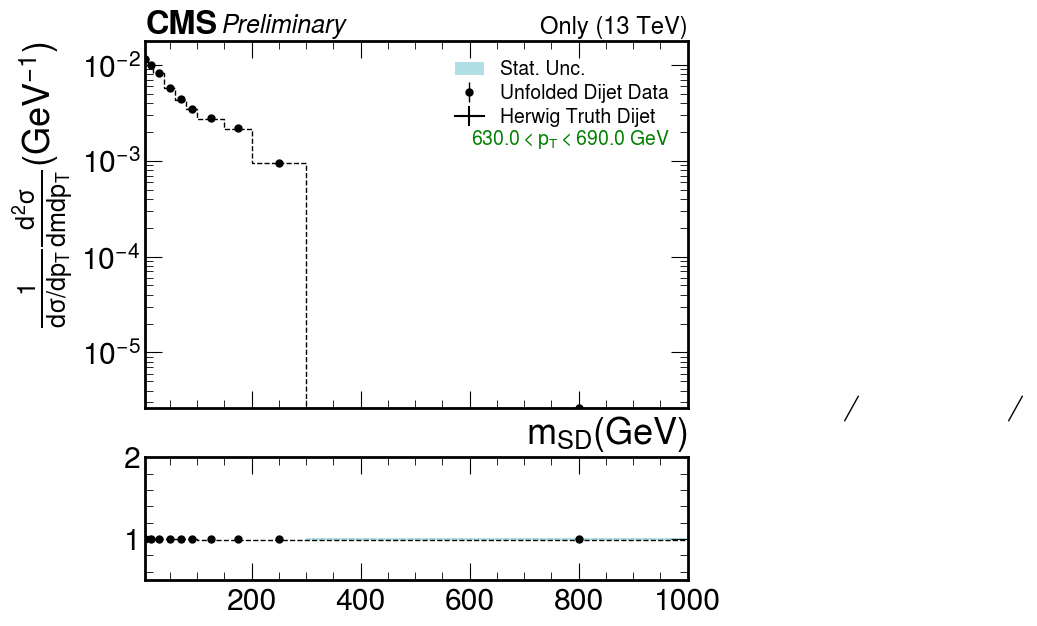

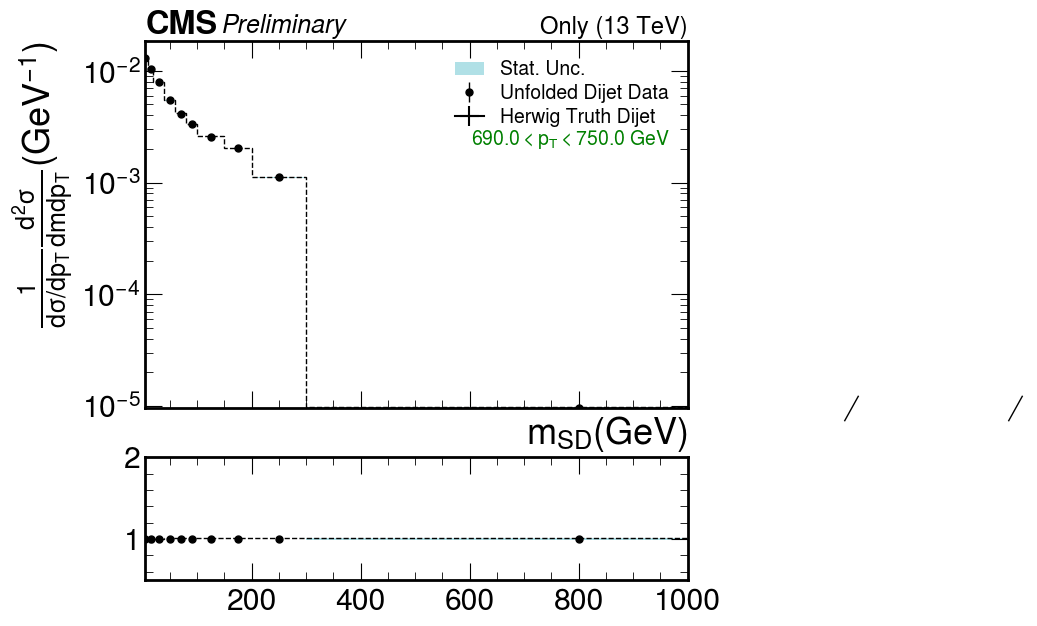

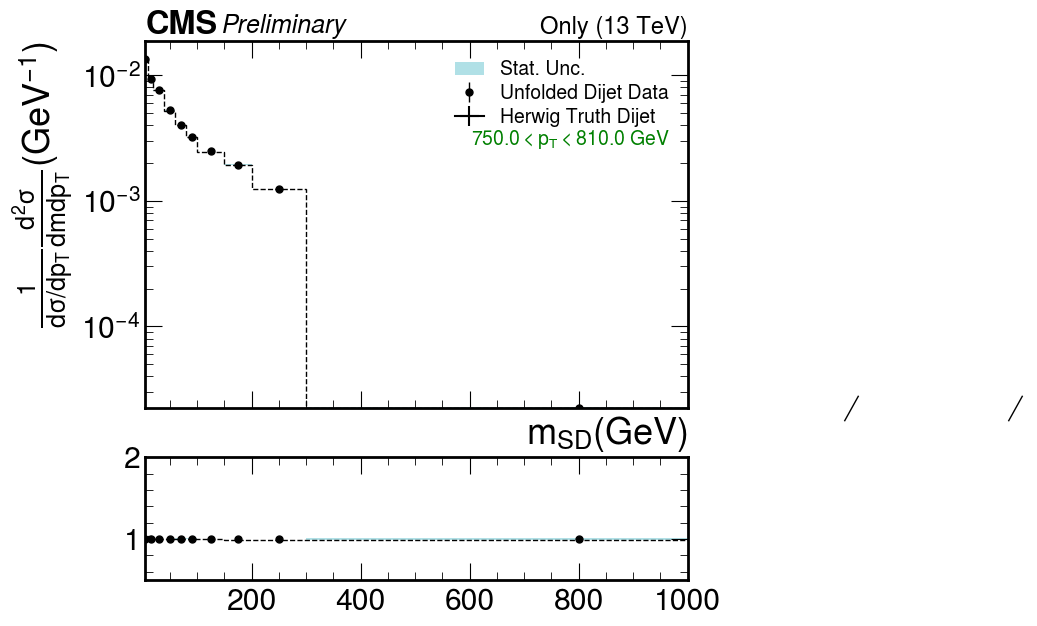

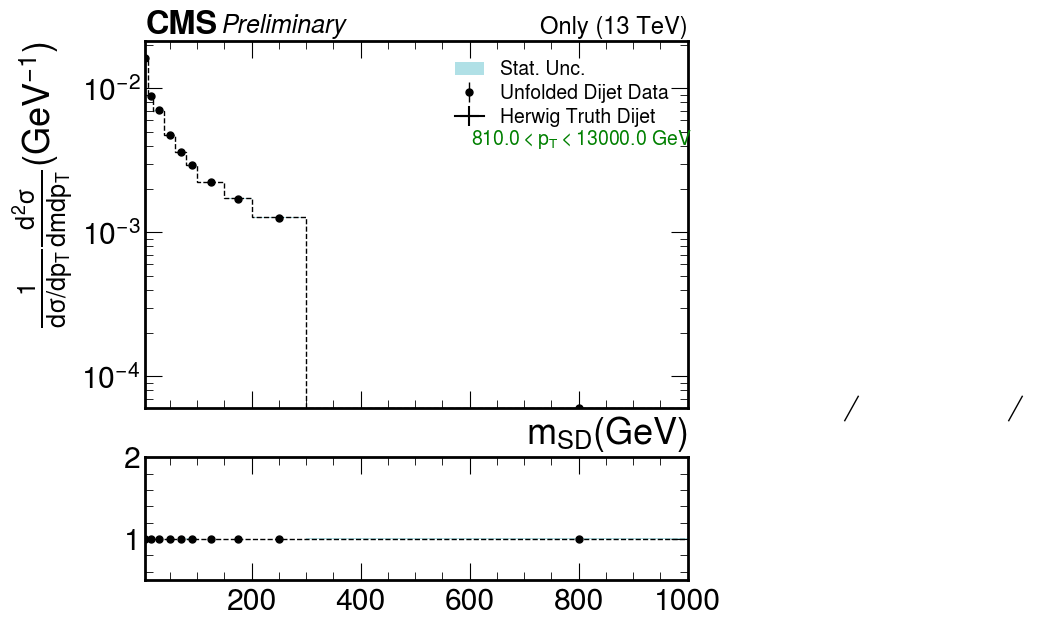

In [39]:
plotUnfoldOutputHist(result["response_matrix_g"], u, channel=channel, os_path=os_path+"Closure", IOV=year, groomed=True)

[200.0, 260.0, 350.0, 430.0, 540.0, 630.0, 690.0, 750.0, 810.0, 13000.0]
Check that sum of values  556834083.7605749  is same as integrate  556860100.5378501
oVals after norm  [ 8.94731038e+07  1.21761923e+08  1.78912367e+08  1.29240923e+08
  1.00257593e+08  4.93304487e+07  1.16182380e+07  7.46896467e+03
 -2.60406541e+05  0.00000000e+00]  by value  680341658.417506
Check that sum of values  328552476.56509465  is same as integrate  328573052.311684
oVals after norm  [2.83163700e+07 4.65228334e+07 7.18336455e+07 4.86566248e+07
 4.01939022e+07 3.40071332e+07 3.30699707e+07 8.00816753e+05
 1.52932238e+03 5.80778473e+04]  by value  303460903.6458142
Check that sum of values  67893355.69562493  is same as integrate  67901159.12772468
oVals after norm  [ 8009085.14651612  8982916.05098021 14659942.53021256 10194919.78457173
  8002897.47793849  6783676.12852884 11458023.12296777  2318157.16472065
    40138.14880929    15916.58141536]  by value  70465672.13666102
Check that sum of values  2525

Warning in <TROOT::Append>: Replacing existing TH1: u (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Input unc (Potential memory leak).


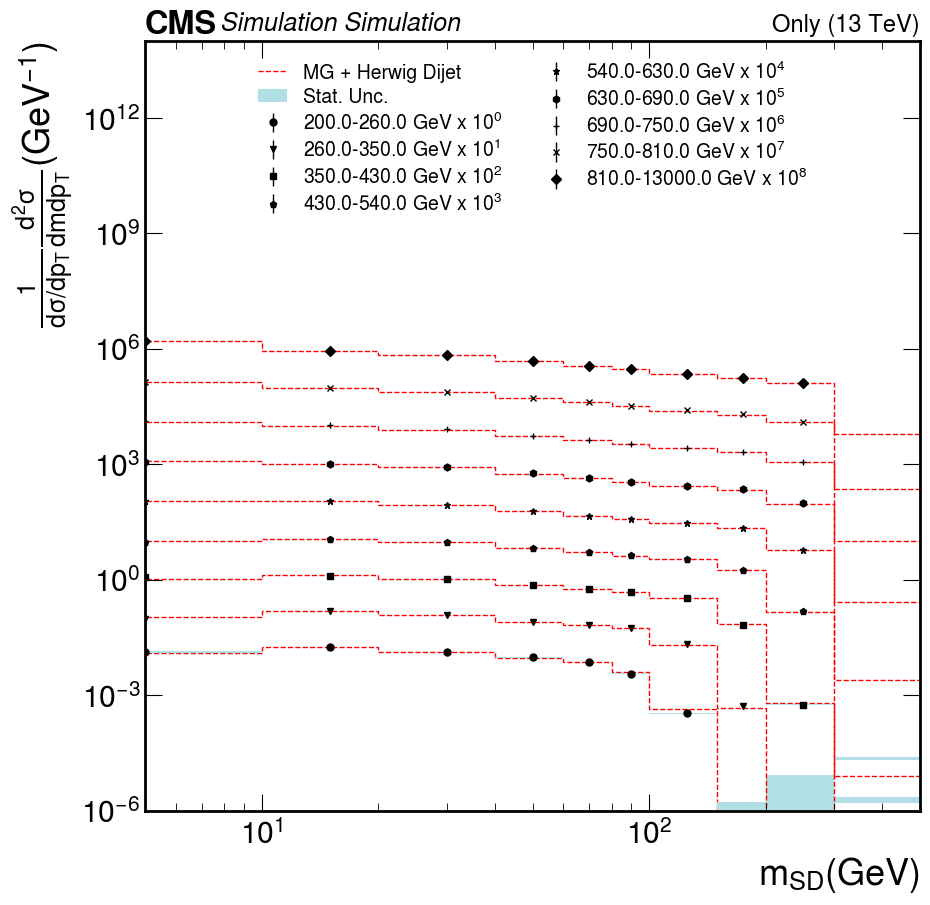

In [40]:
plotStackedOutput(result["response_matrix_g"], u, channel = channel, os_path=os_path+"Closure", IOV=year, groomed=True)

Info in <TUnfold::SetConstraint>: fConstraint=1
Warning in <TUnfold::TUnfold>: 6 output bins do not depend on the input data  0 9-10 20 30 91
Info in <TUnfold::TUnfold>: 180 input bins and 86 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (xaxis:Gen mass in bins of pT (bin #)[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #9 (xaxis:Gen mass in bins of pT (bin #)[8.5,9.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #10 (xaxis:Gen mass in bins of pT (bin #)[9.5,10.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #20 (xaxis:Gen mass in bins of pT (bin #)[19.5,20.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #30 (xaxis:Gen mass in bins of pT (bin #)[29.5,30.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #91 (xaxis:Gen mass in bins of pT (bin #)[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing xaxis regMode=2 densityMode=3 axisSteering=*[UOB]
Warning in <TUnfoldDensity::SetInput>: 34/1

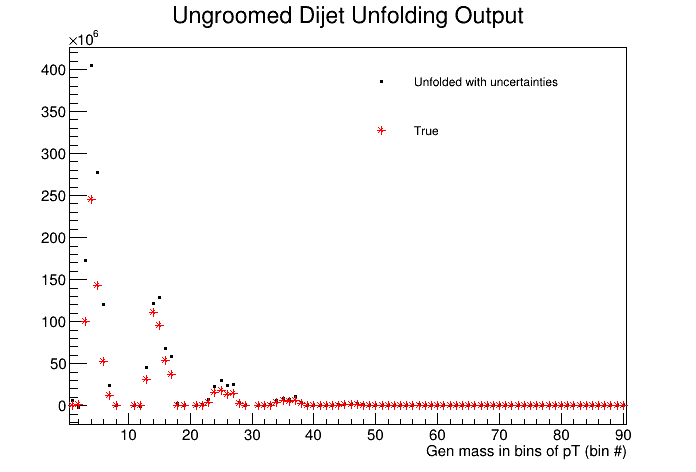

In [41]:
#### do data unfolding test for ungroomed
M = syst_hist_dict["nominal"]["MCGenRec_u"]
M.SetName("Matrix to unfold")
h = DataReco_u
orientation = ROOT.TUnfold.kHistMapOutputHoriz
#kRegModeSize,kRegModeDerivative, kRegModeCurvature
regMode = ROOT.TUnfold.kRegModeDerivative
con = ROOT.TUnfold.kEConstraintArea
mode =  ROOT.TUnfoldDensity.kDensityModeBinWidth
axisSteering =  "*[b]"
u = ROOT.TUnfoldDensity(M,orientation,regMode,con)
for syst in [syst for syst in availSysts if syst!="nominal"]:
    u.AddSysError(syst_hist_dict[syst]["MCGenRec_u"], syst, orientation,  ROOT.TUnfoldDensity.kSysErrModeMatrix)
u.SetInput(h)
#### DEFINE REGULARIZATION PARAMS
nScan = 50
tauMin= 0
tauMax= 0
iBest=0
logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve = ROOT.MakeNullPointer(ROOT.TGraph)
iBest=u.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY)
# u.DoUnfold(0.0)
o=u.GetOutput("Ungroomed "+channel+" Unfolding Output")
o.SetMarkerStyle(7)
o.SetLineColor(ROOT.kBlack)
# htrue = syst_hist_dict["nominal"]["MCGenRec_g"].ProjectionX("Gen groomed")
htrue = syst_hist_dict["nominal"]["MCTruth_u"]
htrue.SetMarkerStyle(3)
htrue.SetMarkerColor(2)

a = ROOT.TCanvas()
o.Draw("e")
htrue.Draw("e same")
leg = ROOT.TLegend(0.9,0.9,0.9,0.9)
legstr = "Unfolded with uncertainties"
leg.AddEntry(o, legstr, "p")
leg.AddEntry(htrue, "True", "p")
leg.SetBorderSize(0)
leg.Draw()
a.Draw()
a.SaveAs(os_path+"UnfoldingOutput_allbins"+year+".png")


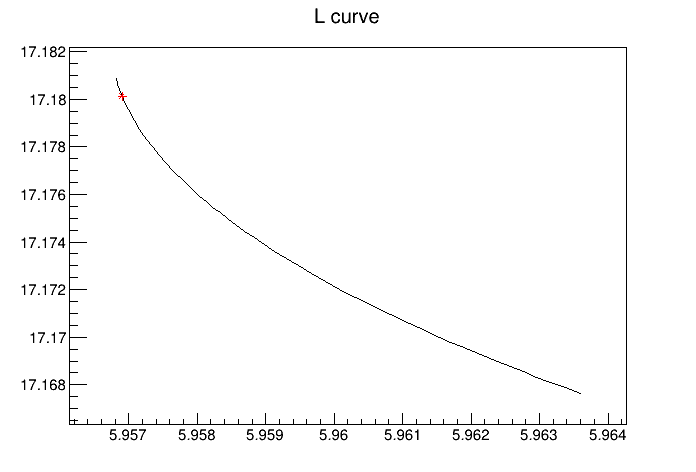

In [42]:
#### Plot Lcurve
cL = ROOT.TCanvas()

x = array.array('d',[0] )
y = array.array('d',[0] )
lCurve.Draw('alp same')

lCurve.GetPoint(iBest, x, y)

bestLCurve=ROOT.TGraph(1,x,y)
bestLCurve.SetMarkerStyle(3)
bestLCurve.SetMarkerColor(ROOT.kRed)
bestLCurve.Draw('same *')
cL.Draw()

[200.0, 260.0, 350.0, 430.0, 540.0, 630.0, 690.0, 750.0, 810.0, 13000.0]
[0.0, 10.0, 20.0, 40.0, 60.0, 80.0, 100.0, 150.0, 200.0, 300.0, 1300.0]
Check that sum of values  556860100.53785  is same as integrate  556860100.53785
oVals after norm  [ 6.15536649e+06 -2.26451538e+06  1.73206657e+08  4.05045043e+08
  2.77717788e+08  1.20065387e+08  2.41288498e+07  3.97396684e+05
  0.00000000e+00  0.00000000e+00]  by value  1004451972.5681043


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_20074/1320953682.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  328573052.3116841  is same as integrate  328573052.3116841
oVals after norm  [-7.32657904e+03 -7.26873225e+05  4.50745093e+07  1.22044226e+08
  1.28474647e+08  6.77864043e+07  5.85516896e+07  2.26361604e+06
 -2.96643107e+05  0.00000000e+00]  by value  423164248.5563657


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_20074/1320953682.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  67901159.12772466  is same as integrate  67901159.12772465
oVals after norm  [   55003.91510952  1026682.79704511  6989303.41129754 23213911.08386282
 30123650.69113604 23666162.89279652 25172687.98464648  4373160.77347961
   211130.51197826        0.        ]  by value  114831694.0613519
Check that sum of values  25263741.472797558  is same as integrate  25263741.472797558
oVals after norm  [  -11961.83922958  -263148.57281111  1755848.44668742  5890029.93947285
  8498664.05647195  7991121.06002211 11493784.28808501  4252936.06353269
   829758.39029889   -25273.62430947]  by value  40411758.20822078


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_20074/1320953682.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  6119255.144640102  is same as integrate  6119255.144640102
oVals after norm  [   5734.6642394    62580.26358506  466504.0583166  1172226.5630485
 1695428.61164331 1868816.15332294 3083615.07985105 1544822.48989528
  663562.9710408    43995.12353317]  by value  10607285.978476103
Check that sum of values  1861933.005963205  is same as integrate  1861933.0059632047
oVals after norm  [ 1.94719504e+02 -2.78178370e+04 -4.93793428e+04  3.43991476e+05
  4.69946808e+05  5.42569391e+05  8.88029426e+05  5.18000280e+05
  3.71224721e+05 -4.45909399e+03]  by value  3052300.547633985


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_20074/1320953682.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  1063330.2805776803  is same as integrate  1063330.2805776803
oVals after norm  [-2.36047926e+02  1.72990186e+04  1.48202659e+05  1.60199689e+05
  1.77308150e+05  2.94771223e+05  5.52443039e+05  3.10055215e+05
  2.19798997e+05  3.75031075e+04]  by value  1917345.048951651


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_20074/1320953682.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  632042.1655658305  is same as integrate  632042.1655658305
oVals after norm  [    824.9600427    -8531.07845238 -121086.43158564  161709.7018667
  140606.49173188  146134.58947311  266067.05890498  157593.4155294
  157794.79029471   16999.05803727]  by value  918112.5558427208


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_20074/1320953682.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  906292.0128059431  is same as integrate  906292.1278831678
oVals after norm  [  8307.30955839 -19165.79831224  87495.24871469  43491.82032512
 254932.94269745 251096.4991717  578301.11608466 354380.89031551
 348916.64880135 153302.79769629]  by value  2061059.4750529176


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_20074/1320953682.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum
Warning in <TROOT::Append>: Replacing existing TH1: u (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Input unc (Potential memory leak).


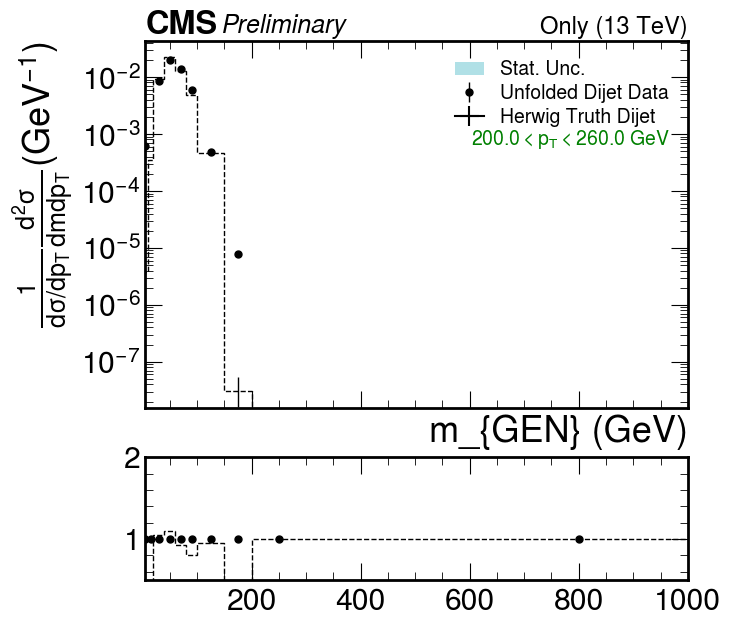

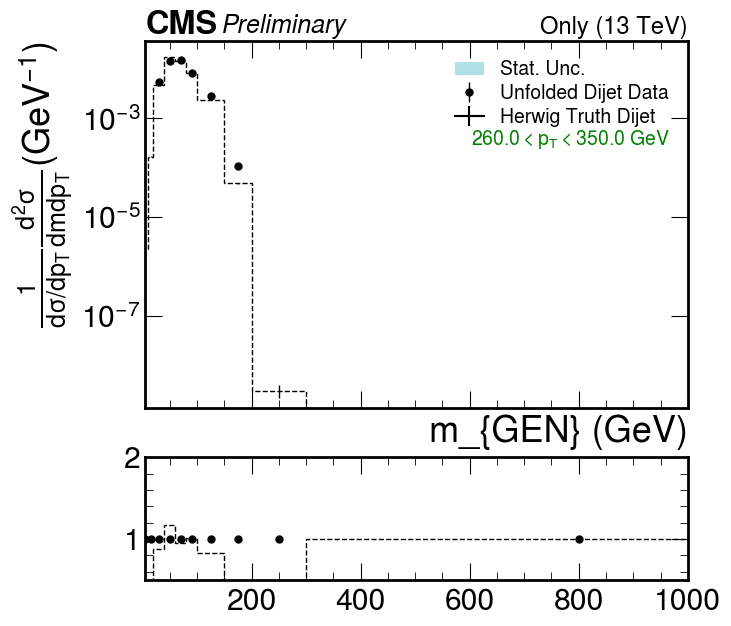

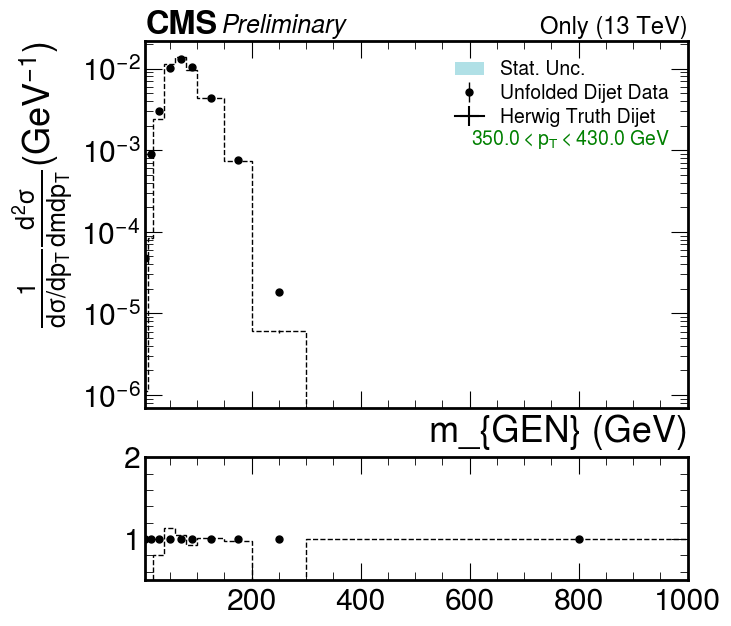

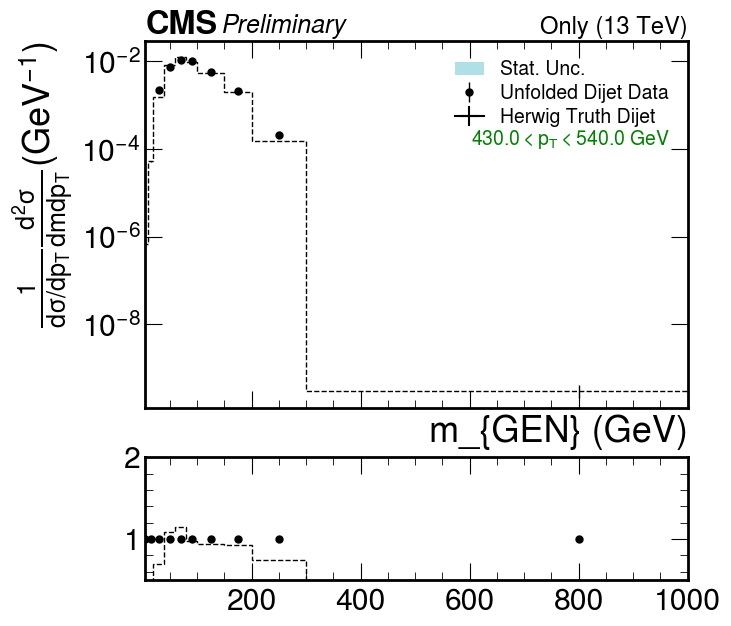

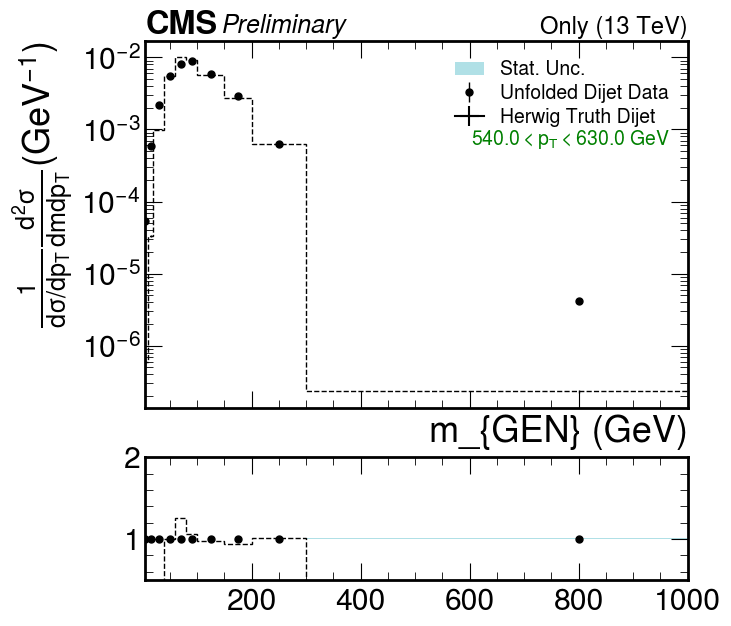

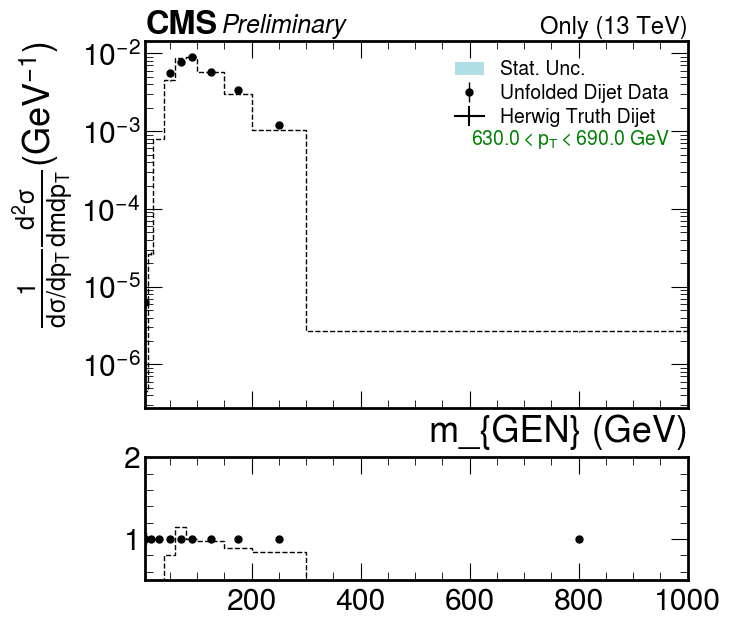

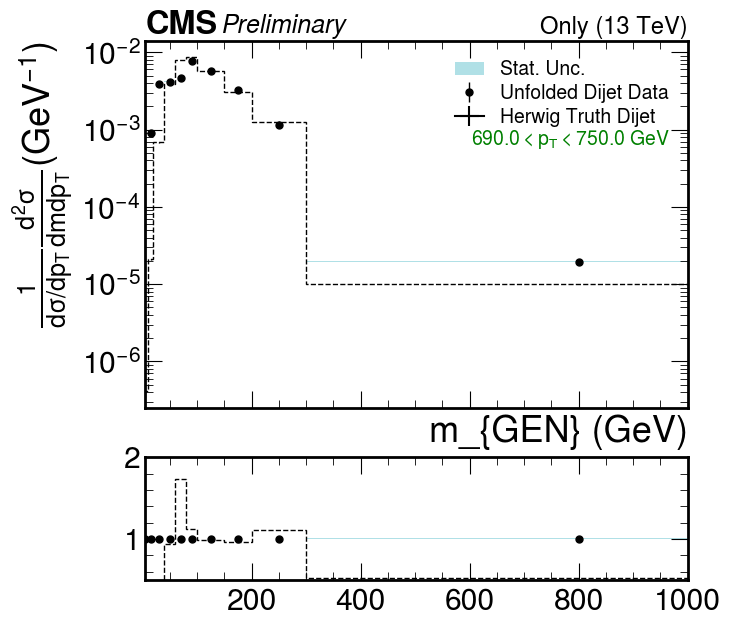

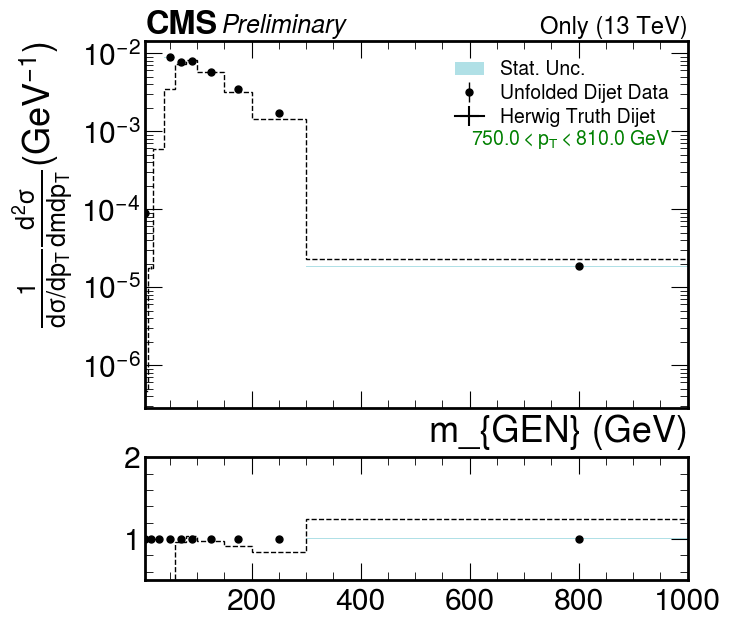

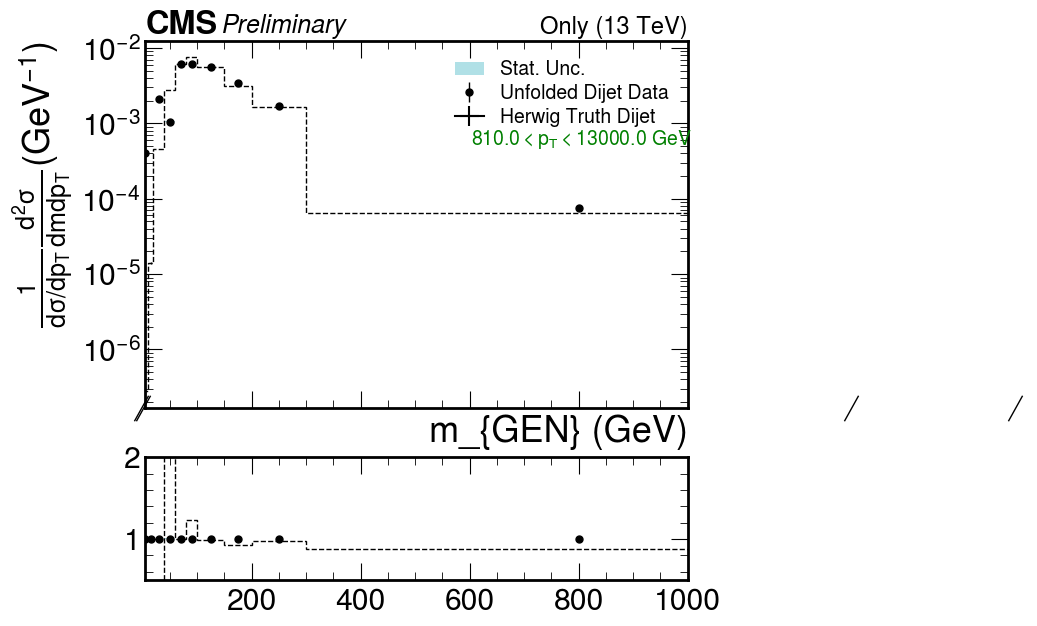

In [43]:
plotUnfoldOutputHist(result["response_matrix_u"], u, channel=channel, os_path=os_path, IOV=year)

[200.0, 260.0, 350.0, 430.0, 540.0, 630.0, 690.0, 750.0, 810.0, 13000.0]
Check that sum of values  556860100.53785  is same as integrate  556860100.53785
oVals after norm  [ 6.15536649e+06 -2.26451538e+06  1.73206657e+08  4.05045043e+08
  2.77717788e+08  1.20065387e+08  2.41288498e+07  3.97396684e+05
  0.00000000e+00  0.00000000e+00]  by value  1004451972.5681043
Check that sum of values  328573052.3116841  is same as integrate  328573052.3116841
oVals after norm  [-7.32657904e+03 -7.26873225e+05  4.50745093e+07  1.22044226e+08
  1.28474647e+08  6.77864043e+07  5.85516896e+07  2.26361604e+06
 -2.96643107e+05  0.00000000e+00]  by value  423164248.5563657
Check that sum of values  67901159.12772466  is same as integrate  67901159.12772465
oVals after norm  [   55003.91510952  1026682.79704511  6989303.41129754 23213911.08386282
 30123650.69113604 23666162.89279652 25172687.98464648  4373160.77347961
   211130.51197826        0.        ]  by value  114831694.0613519
Check that sum of valu

Warning in <TROOT::Append>: Replacing existing TH1: u (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Input unc (Potential memory leak).


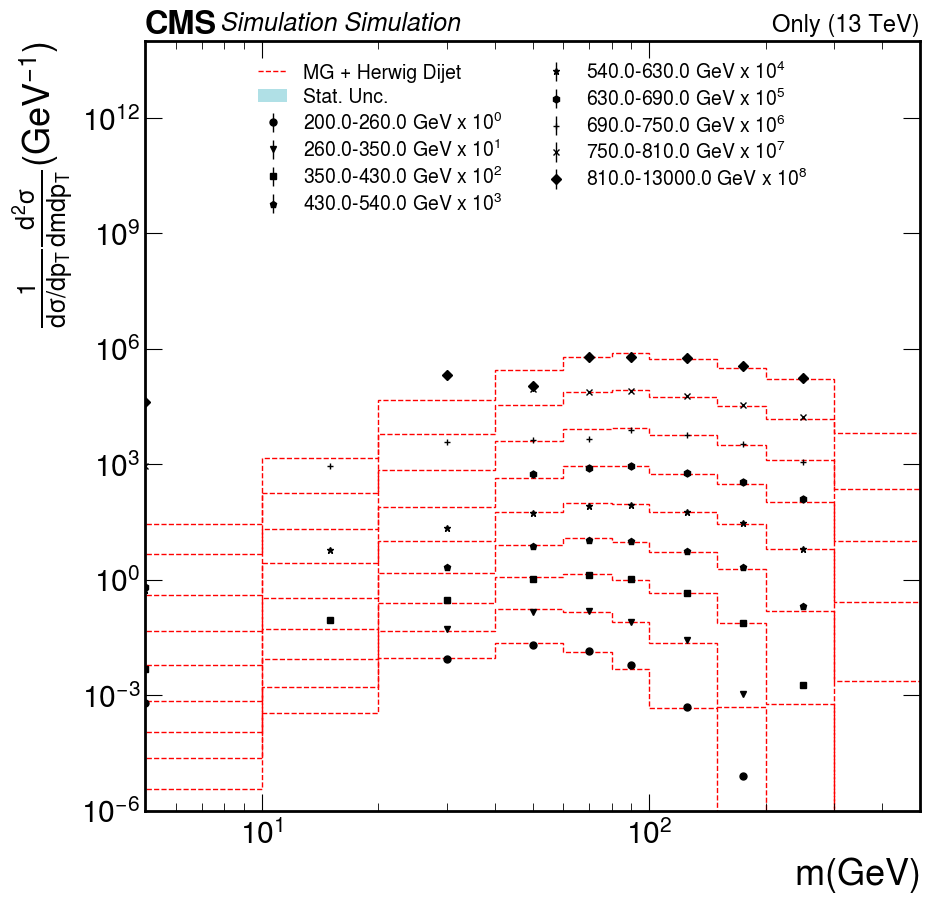

In [44]:
plotStackedOutput(result["response_matrix_u"], u, channel = channel, os_path=os_path, IOV=year)

Info in <TUnfold::SetConstraint>: fConstraint=1
Warning in <TUnfold::TUnfold>: 3 output bins do not depend on the input data  0 10 91
Info in <TUnfold::TUnfold>: 180 input bins and 89 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (xaxis:Gen mass in bins of pT (bin #)[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #10 (xaxis:Gen mass in bins of pT (bin #)[9.5,10.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #91 (xaxis:Gen mass in bins of pT (bin #)[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing xaxis regMode=3 densityMode=3 axisSteering=*[UOB]
Warning in <TUnfoldDensity::SetInput>: 35/180 input bins have zero error, and are ignored.
Info in <TUnfoldDensity::ScanLcurve>: logtau=-Infinity X=5.377638 Y=16.006056
Info in <TUnfoldDensity::ScanLcurve>: logtau=-5.314189 X=5.393338 Y=15.960710
Info in <TUnfoldDensity::ScanLcurve>: logtau=-5.814189 X=5.378098 Y=15.995670
Info in <TUnfoldDensity::ScanLcurve>: logtau=-5.56

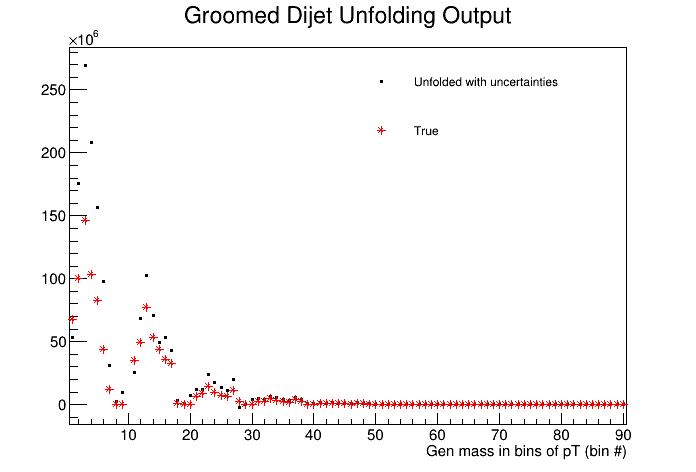

In [45]:
#### do data unfolding test for groomed
M = syst_hist_dict["nominal"]["MCGenRec_g"]
M.SetName("Matrix to unfold")
h = DataReco_g
orientation = ROOT.TUnfold.kHistMapOutputHoriz
regMode = ROOT.TUnfold.kRegModeCurvature
con = ROOT.TUnfold.kEConstraintArea
mode =  ROOT.TUnfoldDensity.kDensityModeBinWidth
axisSteering =  "*[b]"
u = ROOT.TUnfoldDensity(M,orientation,regMode,con)
for syst in [syst for syst in availSysts if syst!="nominal"]:
    u.AddSysError(syst_hist_dict[syst]["MCGenRec_g"], syst, orientation,  ROOT.TUnfoldDensity.kSysErrModeMatrix)
u.SetInput(h)
nScan = 50
tauMin= 0
tauMax= 0
iBest=0
logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve = ROOT.MakeNullPointer(ROOT.TGraph)
iBest=u.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY)
# u.DoUnfold(0.0)
o=u.GetOutput("Groomed "+channel+" Unfolding Output")
o.SetMarkerStyle(7)
o.SetLineColor(ROOT.kBlack)
# htrue = syst_hist_dict["nominal"]["MCGenRec_g"].ProjectionX("Gen groomed")
htrue = syst_hist_dict["nominal"]["MCTruth_g"]
htrue.SetMarkerStyle(3)
htrue.SetMarkerColor(2)

a = ROOT.TCanvas()
o.Draw("e")
htrue.Draw("e same")
leg = ROOT.TLegend(0.9,0.9,0.9,0.9)
legstr = "Unfolded with uncertainties"
leg.AddEntry(o, legstr, "p")
leg.AddEntry(htrue, "True", "p")
leg.SetBorderSize(0)
leg.Draw()
a.Draw()
a.SaveAs(os_path+"GroomedUnfoldingOutput_allbins"+year+".png")


[200.0, 260.0, 350.0, 430.0, 540.0, 630.0, 690.0, 750.0, 810.0, 13000.0]
[0.0, 10.0, 20.0, 40.0, 60.0, 80.0, 100.0, 150.0, 200.0, 300.0, 1300.0]
Check that sum of values  556834083.7605749  is same as integrate  556860100.5378501
oVals after norm  [5.35163981e+07 1.75503309e+08 2.69652158e+08 2.08152115e+08
 1.56403599e+08 9.80893873e+07 3.11657695e+07 2.79044391e+06
 9.96069088e+06 0.00000000e+00]  by value  1005233871.2252165
Check that sum of values  328552476.56509465  is same as integrate  328573052.311684
oVals after norm  [2.51981369e+07 6.82205532e+07 1.02849621e+08 7.06927372e+07
 4.94821872e+07 5.30322454e+07 4.31302063e+07 3.17518446e+06
 1.28686249e+06 6.91293301e+06]  by value  423980666.7229059
Check that sum of values  67893355.69562493  is same as integrate  67901159.12772468
oVals after norm  [12442879.89862886 12391783.04903805 23934314.68519966 17292425.30367915
 13918260.72200646 11338668.6527413  19946355.11508359 -2330329.22955732
   375035.75408564  4377267.83841

/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_20074/1320953682.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  25259858.34764176  is same as integrate  25263741.47279756
oVals after norm  [4616129.42784296 3888114.99347371 6853193.28533396 5431402.19030238
 4009018.40163172 3430786.35586239 5827571.42173579 4299649.04630605
  794343.01472774  987903.39174211]  by value  40138111.52895881
Check that sum of values  6117971.831141926  is same as integrate  6119255.144640102
oVals after norm  [1779242.44128275  884866.61530726 1456326.50471202 1219697.47722434
  925227.40961645  770959.46723242 1804600.91162427  903728.12839677
  703502.19826184  -19082.56044036]  by value  10429068.593217785


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_20074/1320953682.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  1861438.37272441  is same as integrate  1861933.0059632051
oVals after norm  [ 83862.83035091 427764.34360024 437392.96365829 334326.04663498
 282892.74908648 273253.66219638 358629.04440975 459837.75527385
 346942.31270659  36696.03196054]  by value  3041597.7398780137
Check that sum of values  1063019.900109099  is same as integrate  1063330.2805776803
oVals after norm  [499018.8911343  158630.02992466 223902.37598472 180811.44271913
 148713.09013117 104126.00411702 266064.3604235  153450.05012688
 200825.01417416  20335.5508096 ]  by value  1955876.809545138
Check that sum of values  631827.6062470414  is same as integrate  632042.1655658305
oVals after norm  [-59003.75644962 138994.04898704 128735.5214146   94474.49352947
  79630.55672291  80325.51043986 113255.46555333 117863.45324223
 139609.45087817  30656.92158859]  by value  864541.6659065827


/var/folders/37/z02fmxhj36d4f8xp01pqm2ym0000gn/T/ipykernel_20074/1320953682.py:64: RuntimeWarning: invalid value encountered in sqrt
  oHistErr = np.sqrt(oVals)/oVals_sum


Check that sum of values  905900.659424764  is same as integrate  906292.1278831677
oVals after norm  [ 73077.67411859 454375.54134082 332984.91714494 172246.33367658
 142498.99517974 123596.75829695 226846.34672874 168453.05642559
 244700.57969427 146600.7224463 ]  by value  2085380.9250525222


Warning in <TROOT::Append>: Replacing existing TH1: u (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Input unc (Potential memory leak).


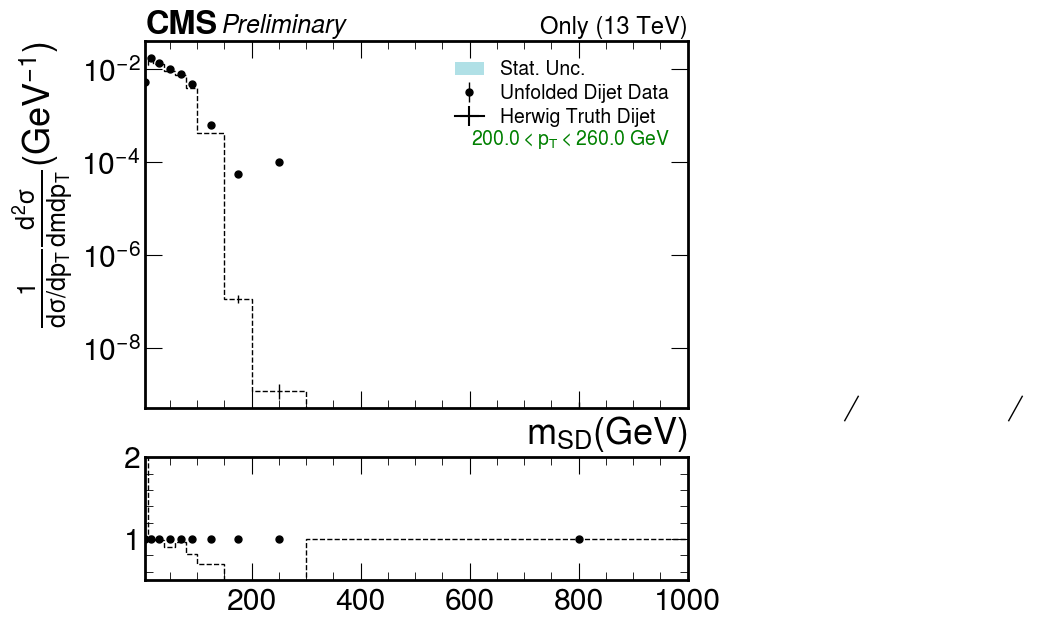

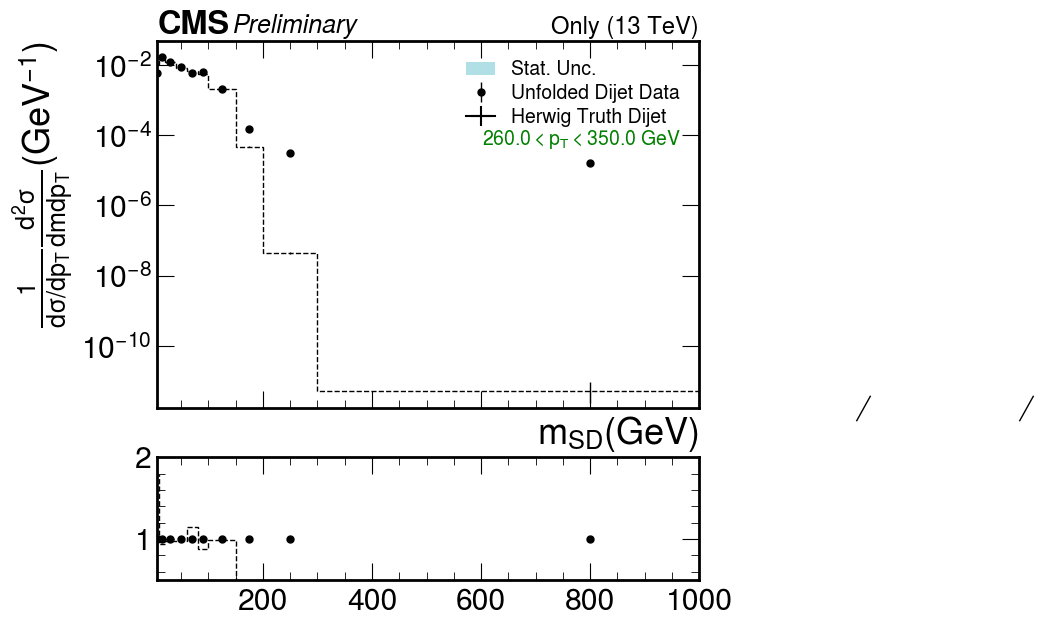

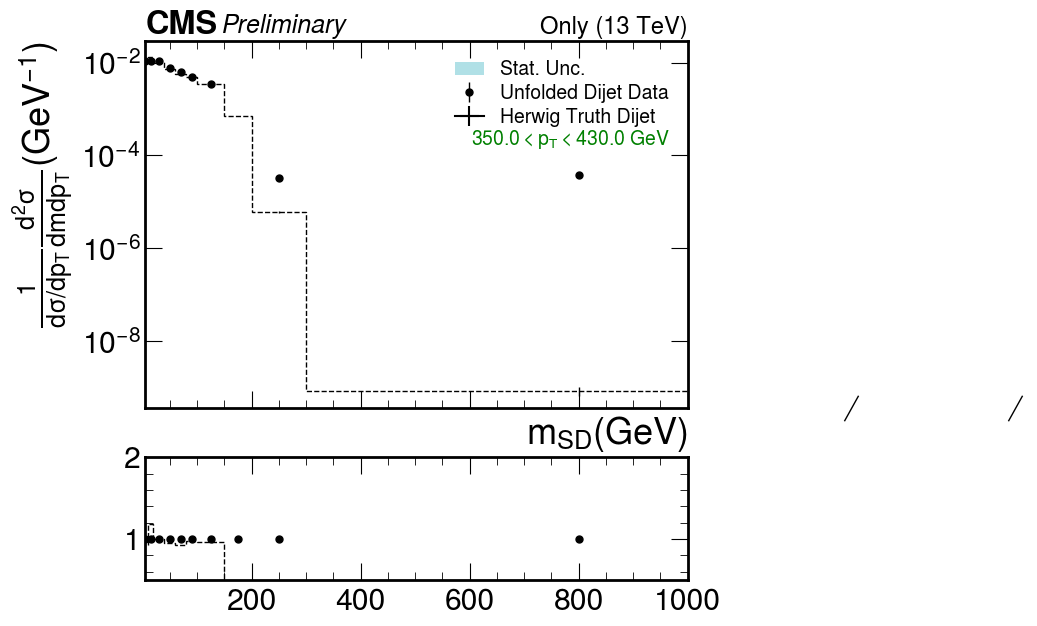

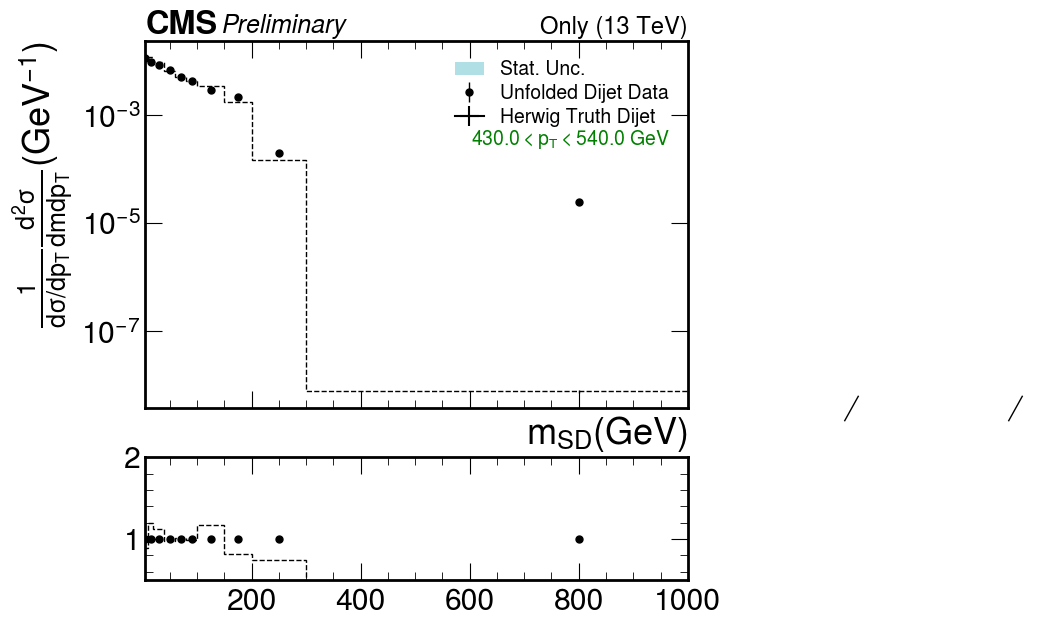

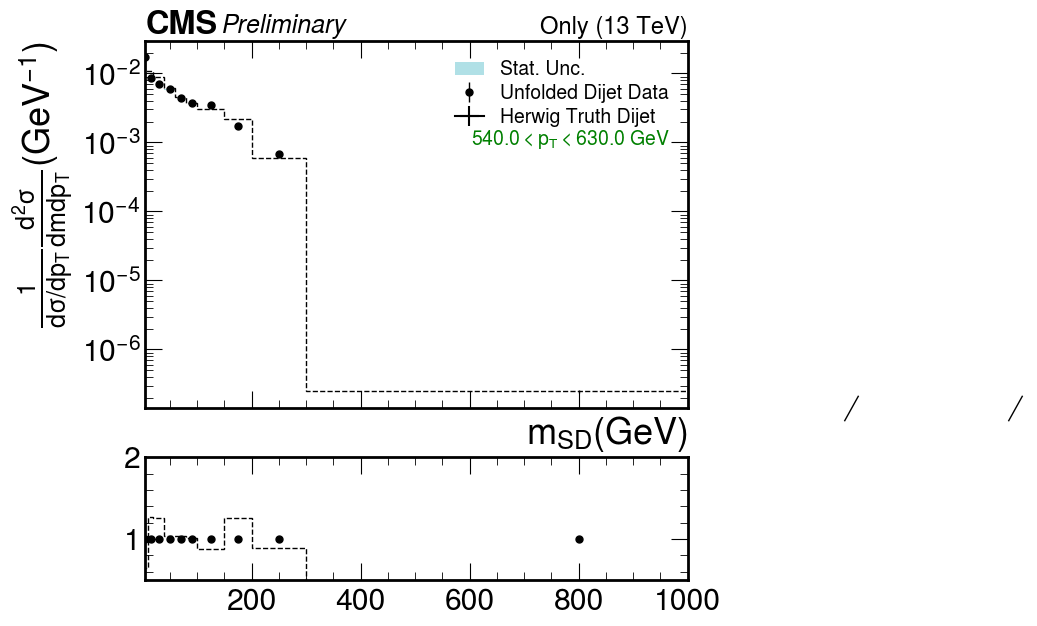

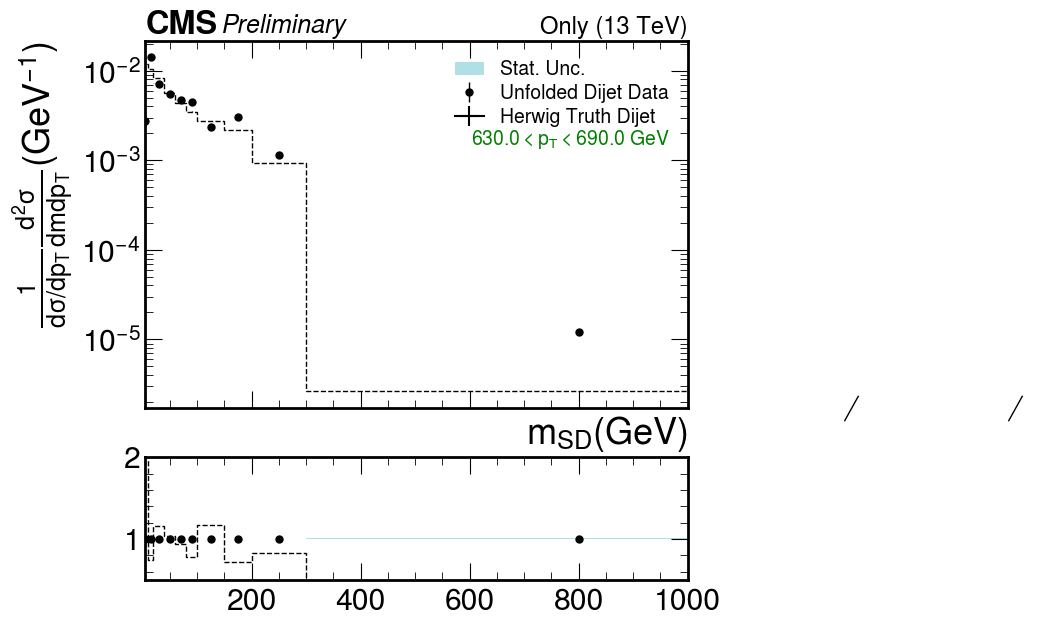

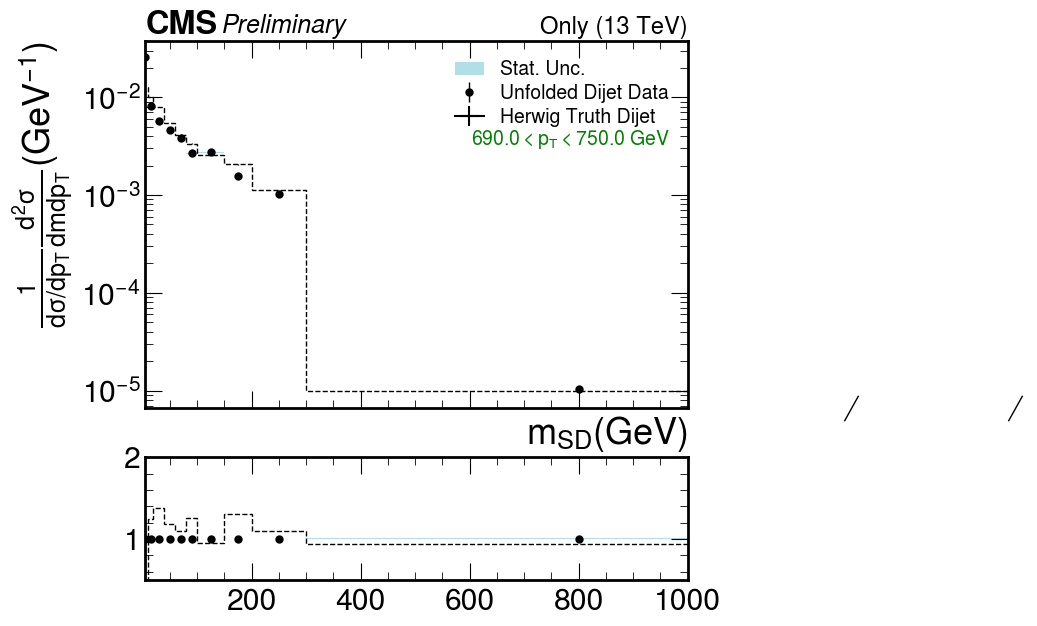

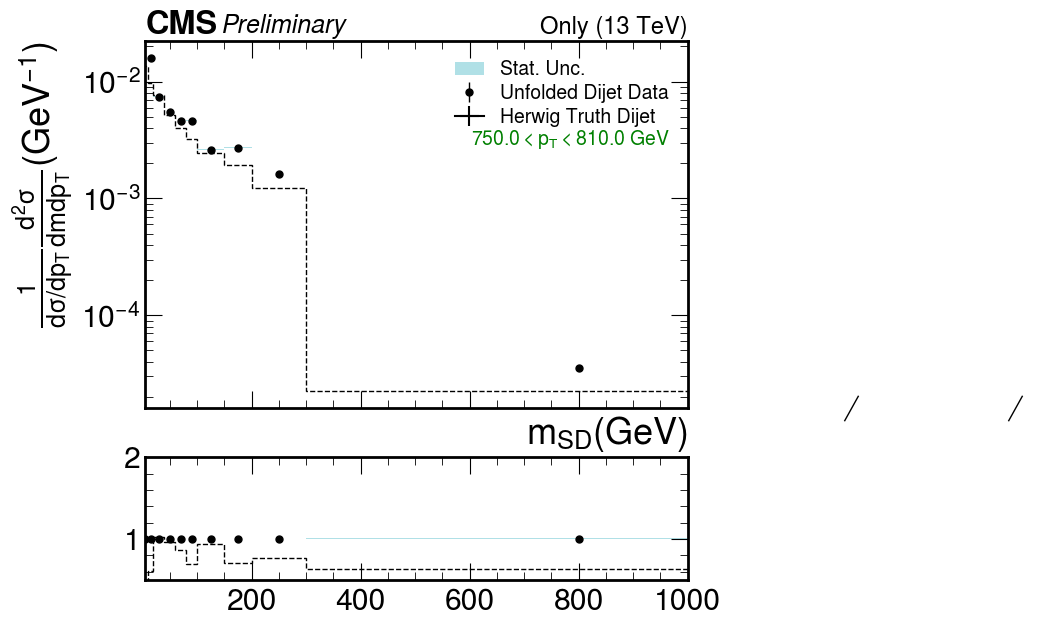

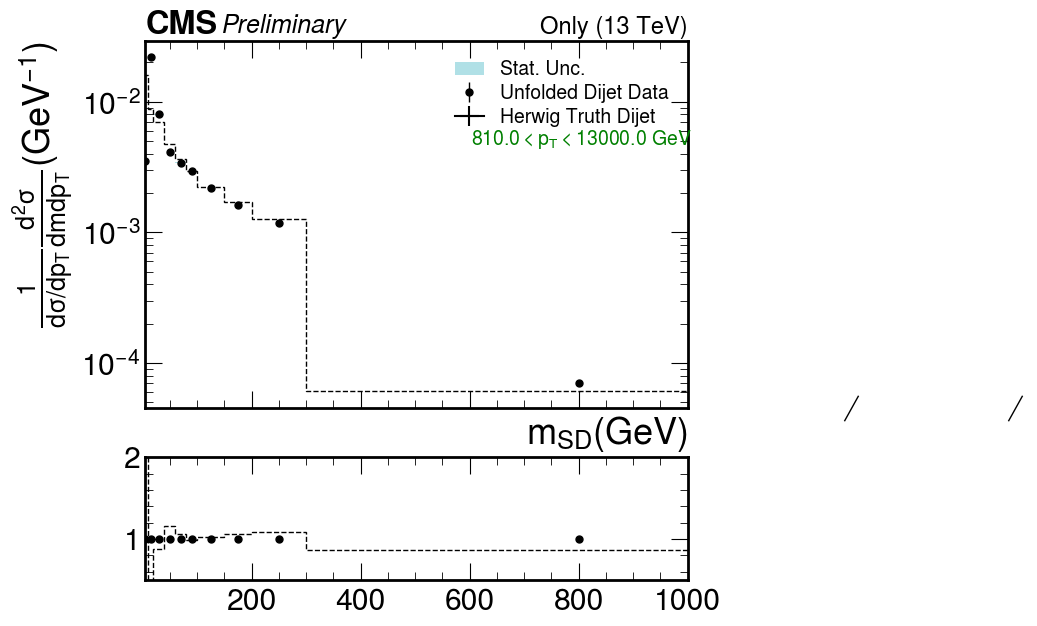

In [46]:
plotUnfoldOutputHist(result["response_matrix_g"], u, channel=channel, os_path=os_path, IOV=year, groomed=True)

[200.0, 260.0, 350.0, 430.0, 540.0, 630.0, 690.0, 750.0, 810.0, 13000.0]
Check that sum of values  556834083.7605749  is same as integrate  556860100.5378501
oVals after norm  [5.35163981e+07 1.75503309e+08 2.69652158e+08 2.08152115e+08
 1.56403599e+08 9.80893873e+07 3.11657695e+07 2.79044391e+06
 9.96069088e+06 0.00000000e+00]  by value  1005233871.2252165
Check that sum of values  328552476.56509465  is same as integrate  328573052.311684
oVals after norm  [2.51981369e+07 6.82205532e+07 1.02849621e+08 7.06927372e+07
 4.94821872e+07 5.30322454e+07 4.31302063e+07 3.17518446e+06
 1.28686249e+06 6.91293301e+06]  by value  423980666.7229059
Check that sum of values  67893355.69562493  is same as integrate  67901159.12772468
oVals after norm  [12442879.89862886 12391783.04903805 23934314.68519966 17292425.30367915
 13918260.72200646 11338668.6527413  19946355.11508359 -2330329.22955732
   375035.75408564  4377267.83841314]  by value  113686661.7893185
Check that sum of values  25259858.347

Warning in <TROOT::Append>: Replacing existing TH1: u (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Input unc (Potential memory leak).


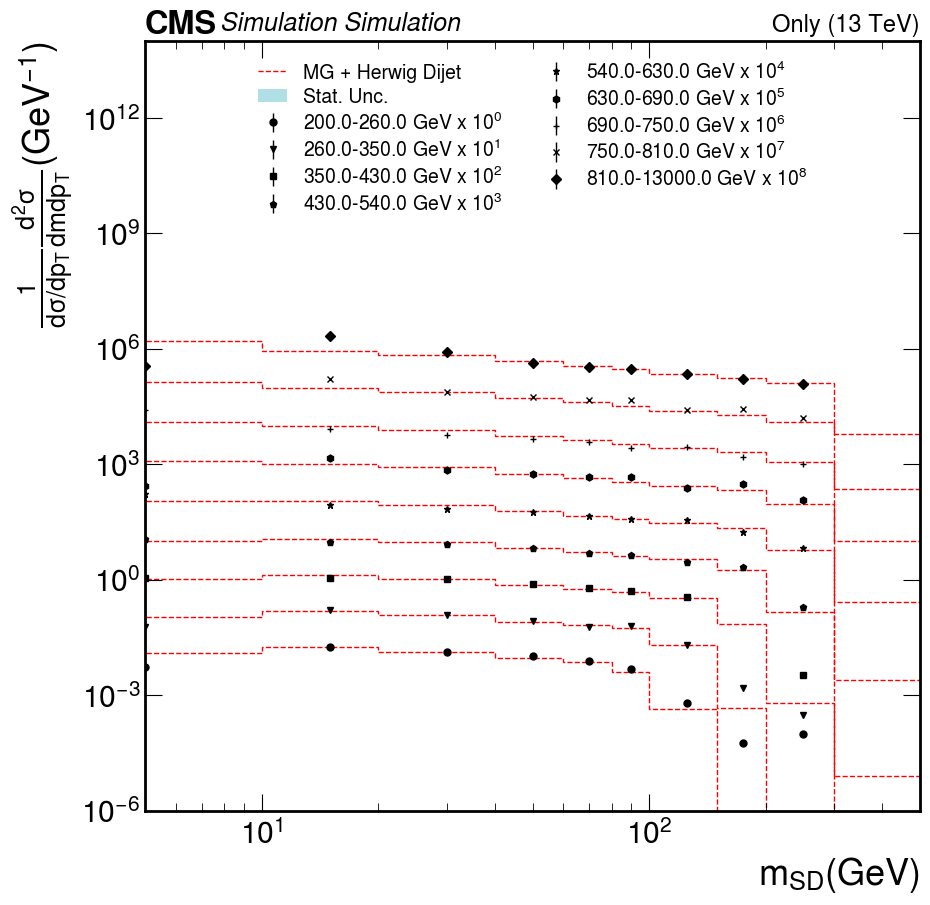

In [47]:
plotStackedOutput(result["response_matrix_g"], u, channel = channel, os_path=os_path, IOV=year, groomed=True)